# I. Introduction

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Input variables:
   ## Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   ## Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
   ## Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ## Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")
  
  # II. Import Dataset

In [1]:
#Import needed library
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/nguyenminhhieu/Downloads/Basic Python/bankmarketing.csv",delimiter=';')

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Dividing datasets into categorical and numerical variable list
categorical_var = ["job", "marital", "education", "default", "housing", "loan", 
                   "contact", "month", "day_of_week", "poutcome"]
numerical_var = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate",
                "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# III. Missing Values

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [6]:
df.replace('unknown', np.NaN, inplace = True)

In [7]:
df.isnull().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [8]:
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [9]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  

# IV. Exploratory Analysis
1. Categorical Variable

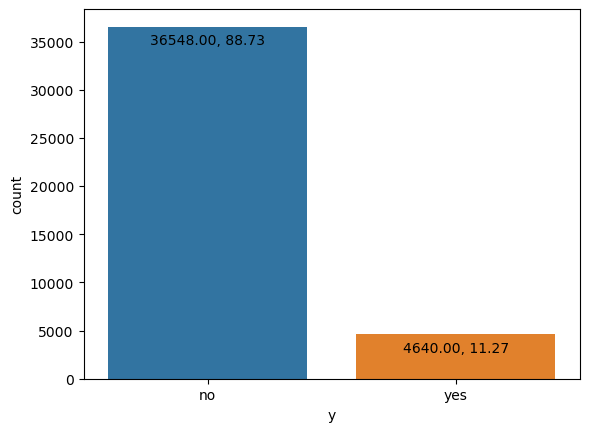

In [10]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


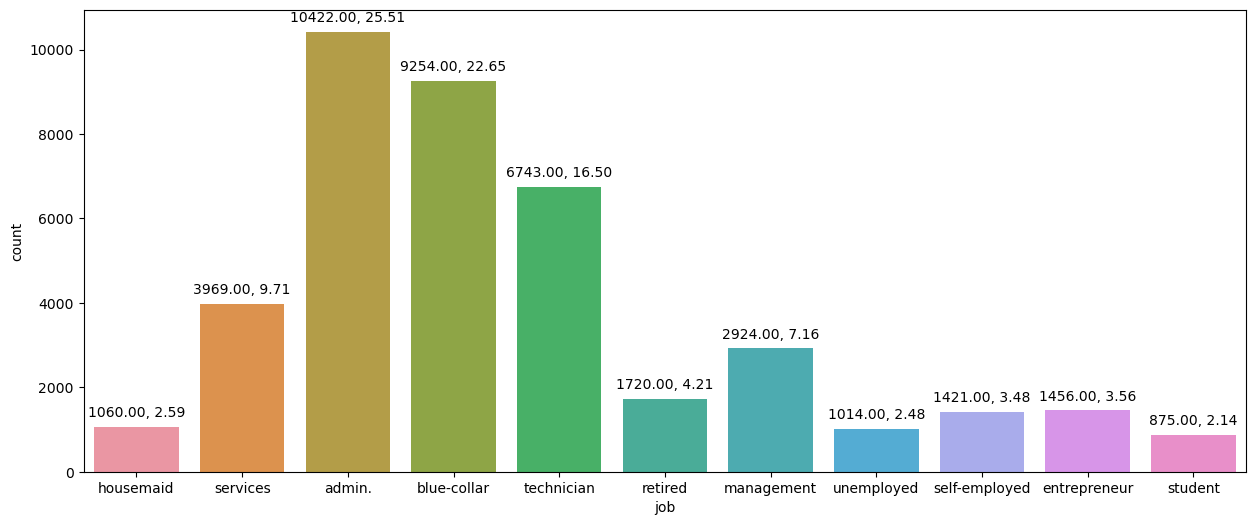

Marital


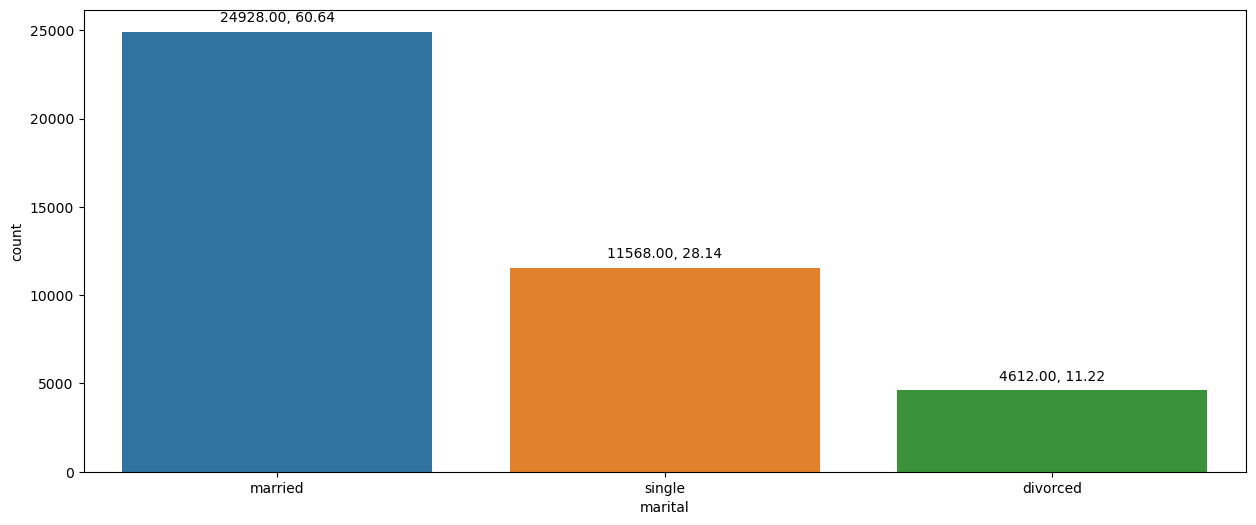

Education


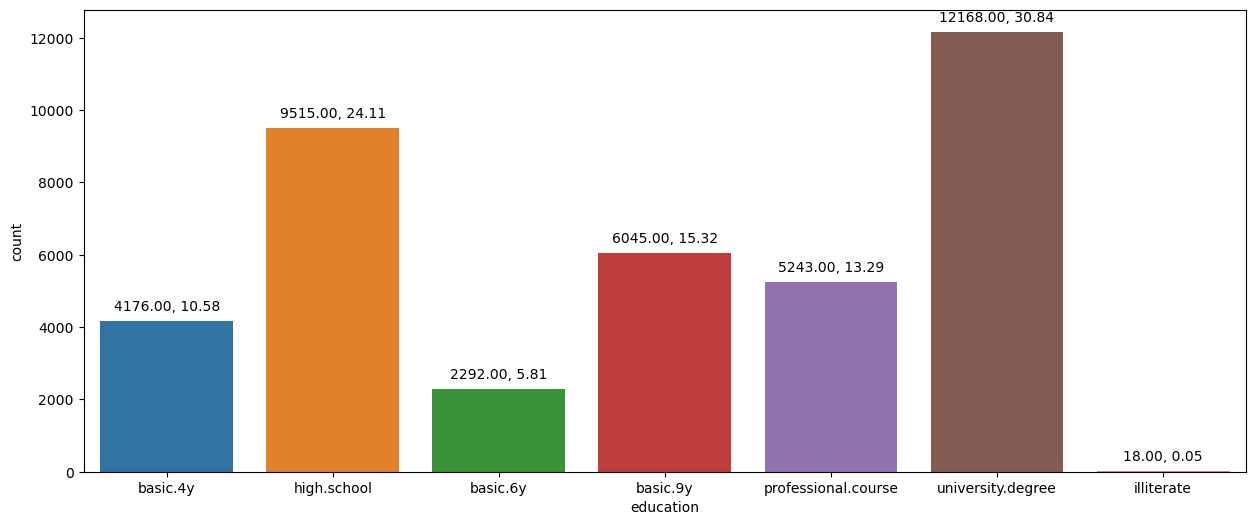

Default


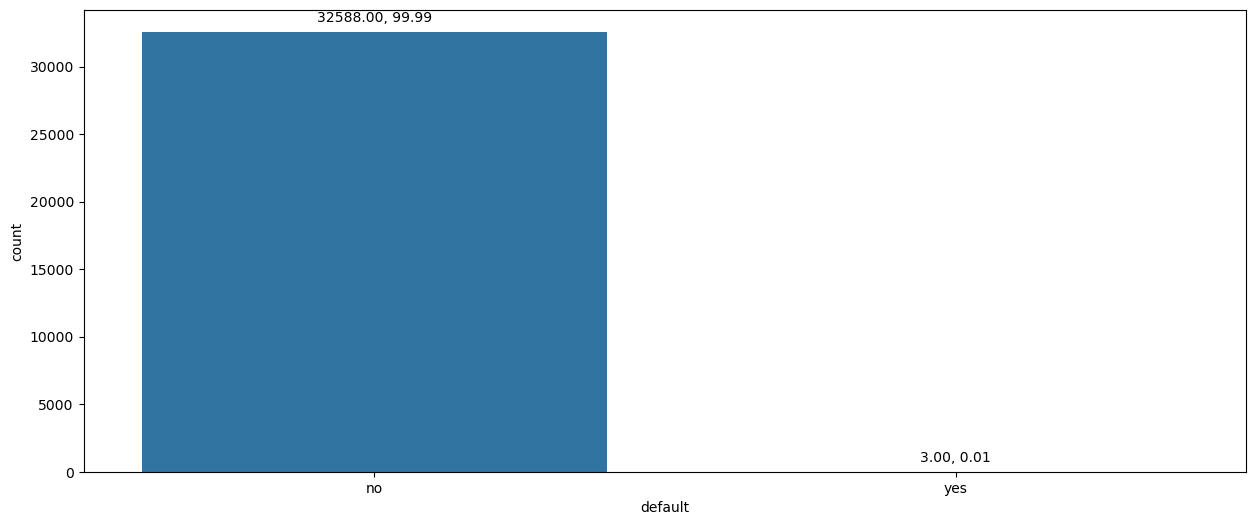

Housing


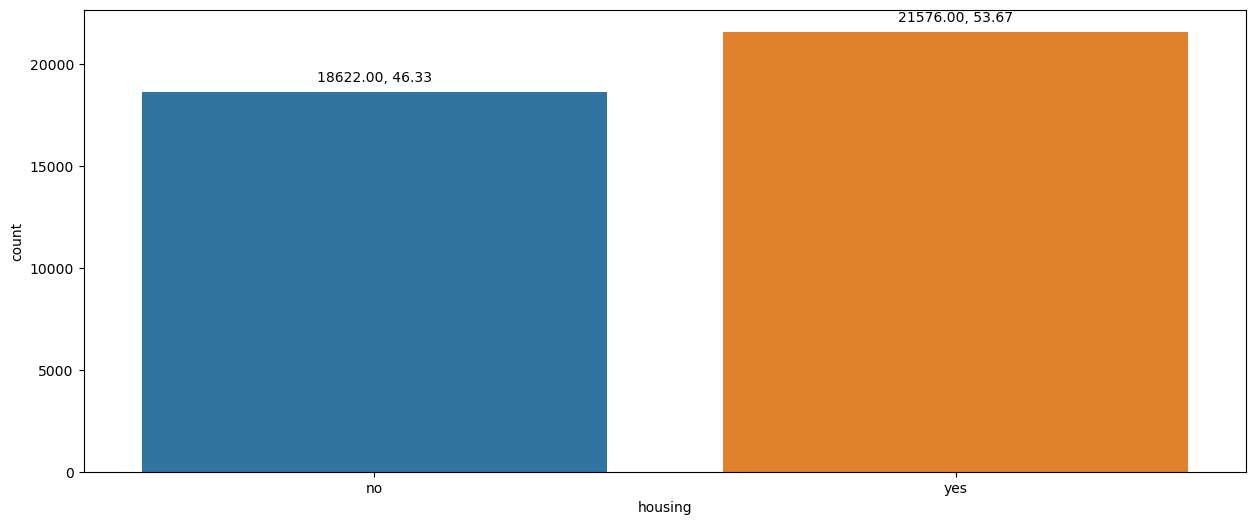

Loan


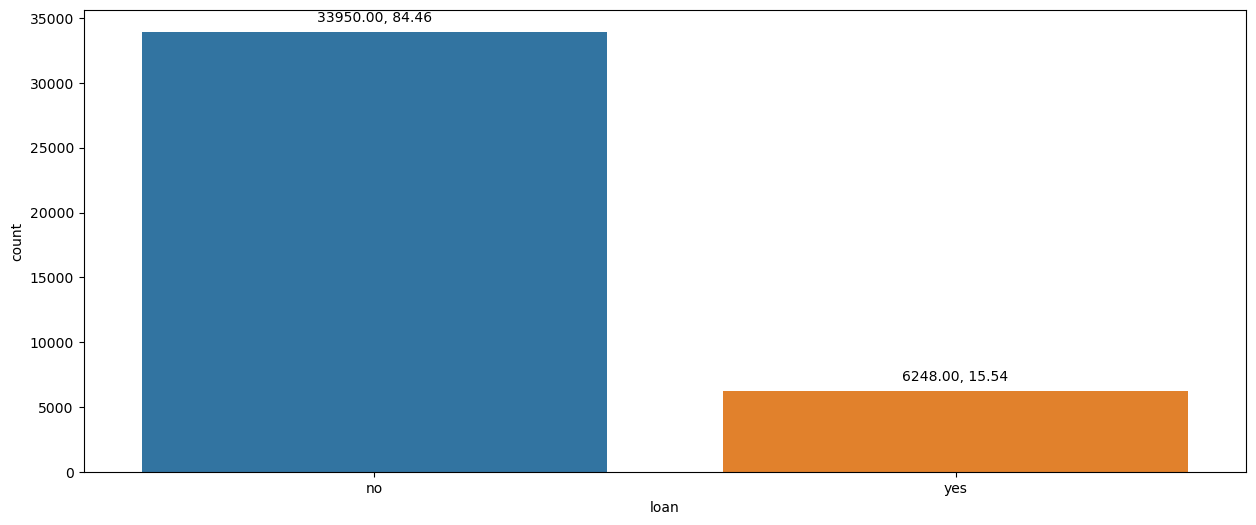

Contact


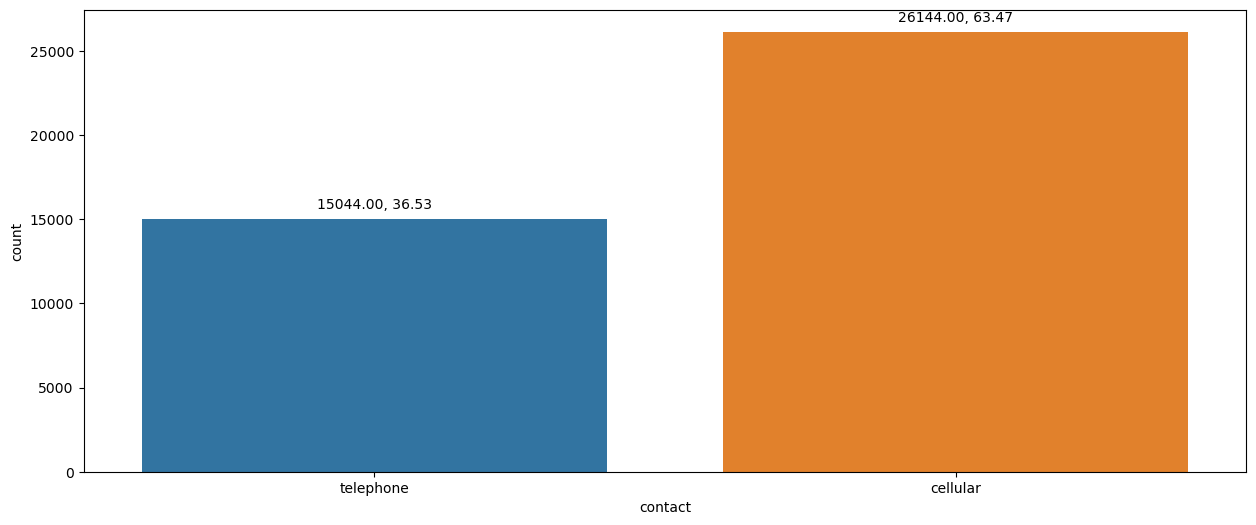

Month


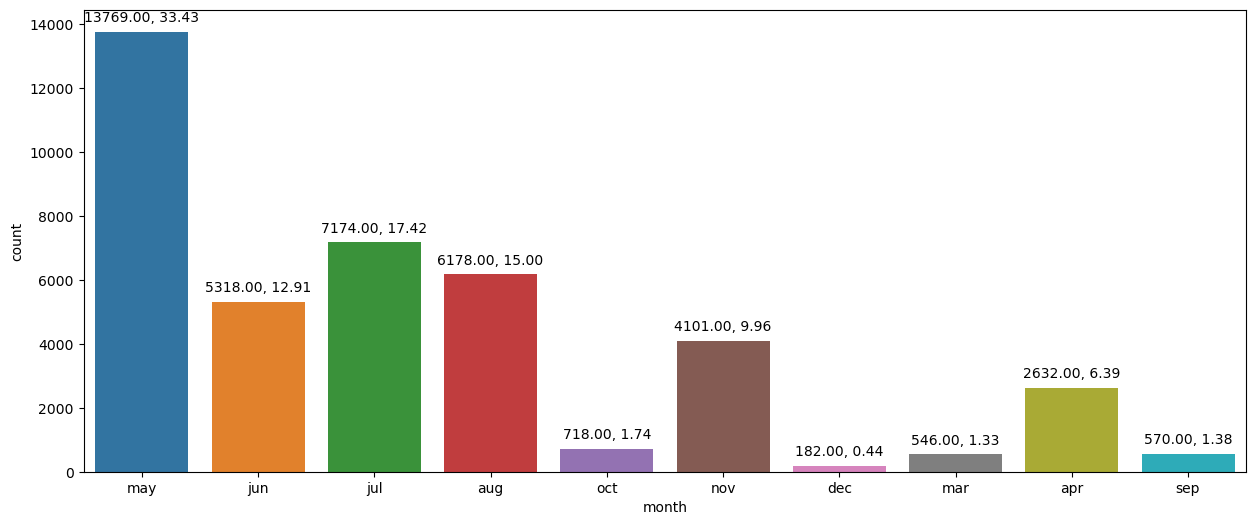

Day_Of_Week


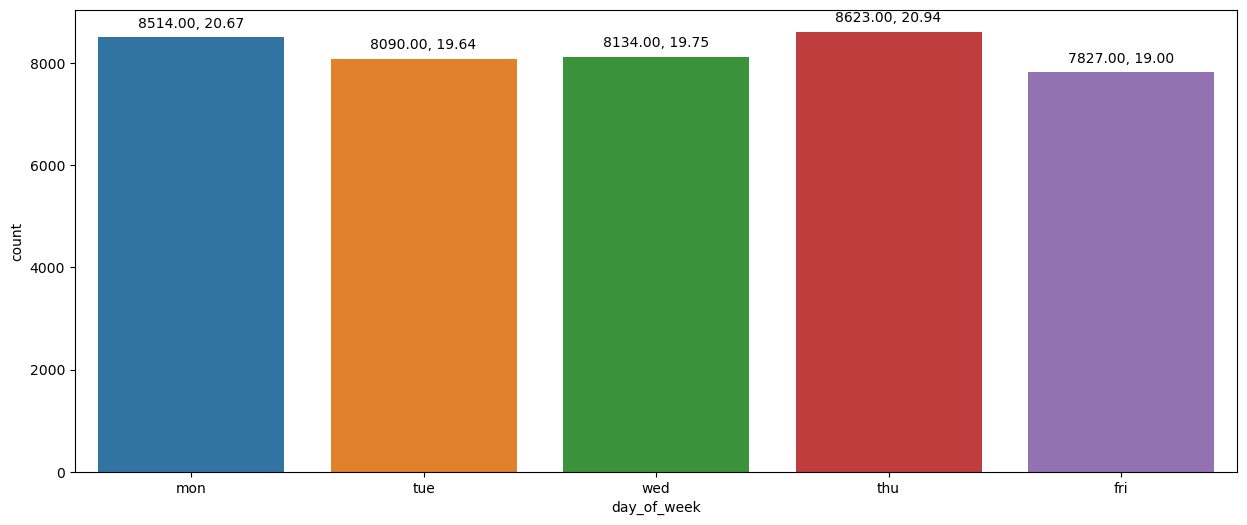

Poutcome


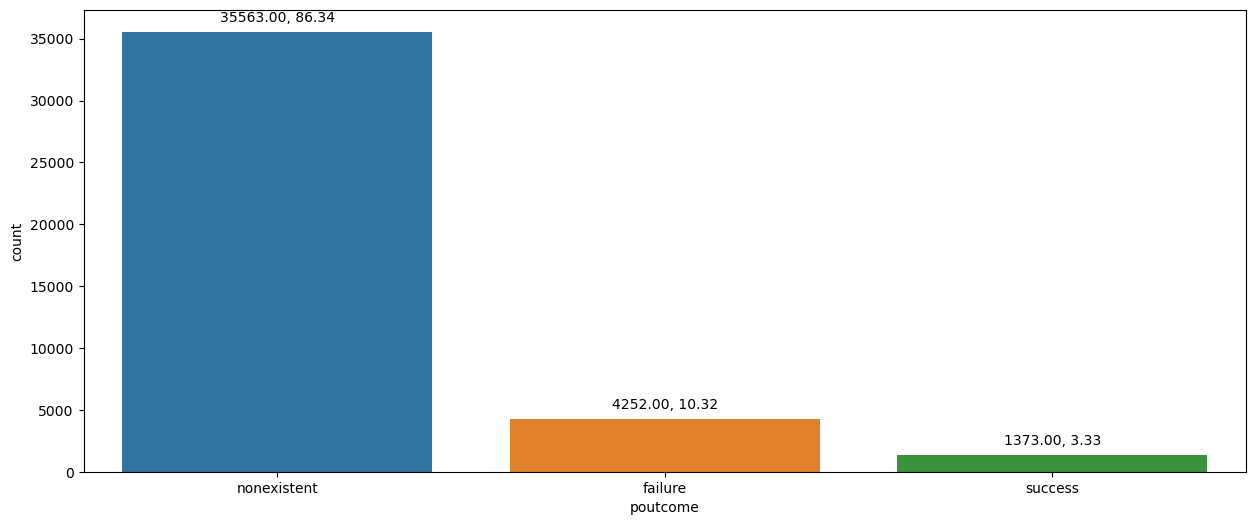

In [11]:
for column in categorical_var:
    plt.figure(figsize=(15,6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()
    

Job


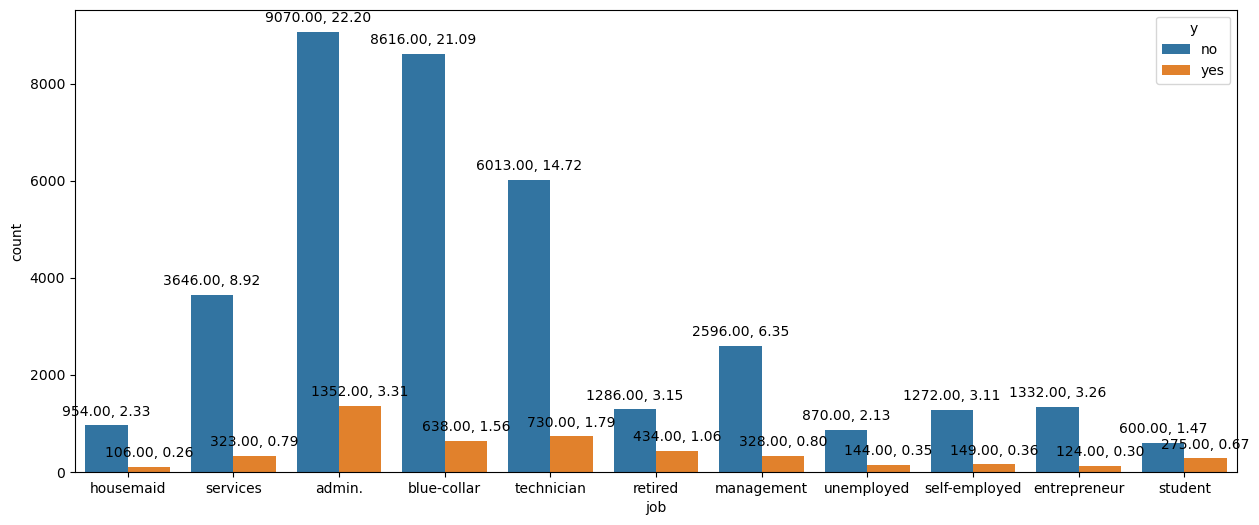

Marital


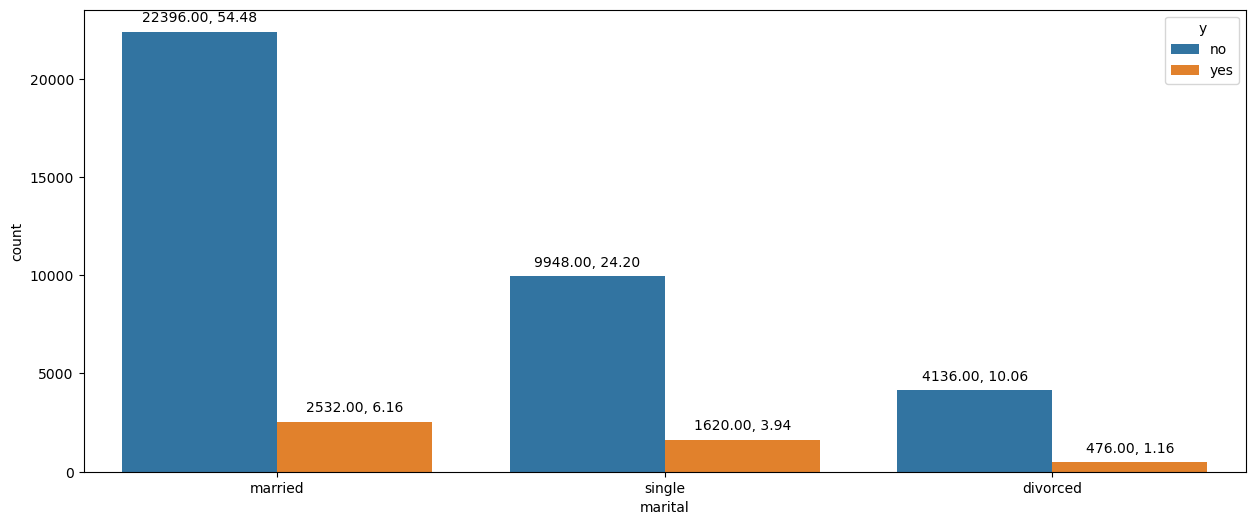

Education


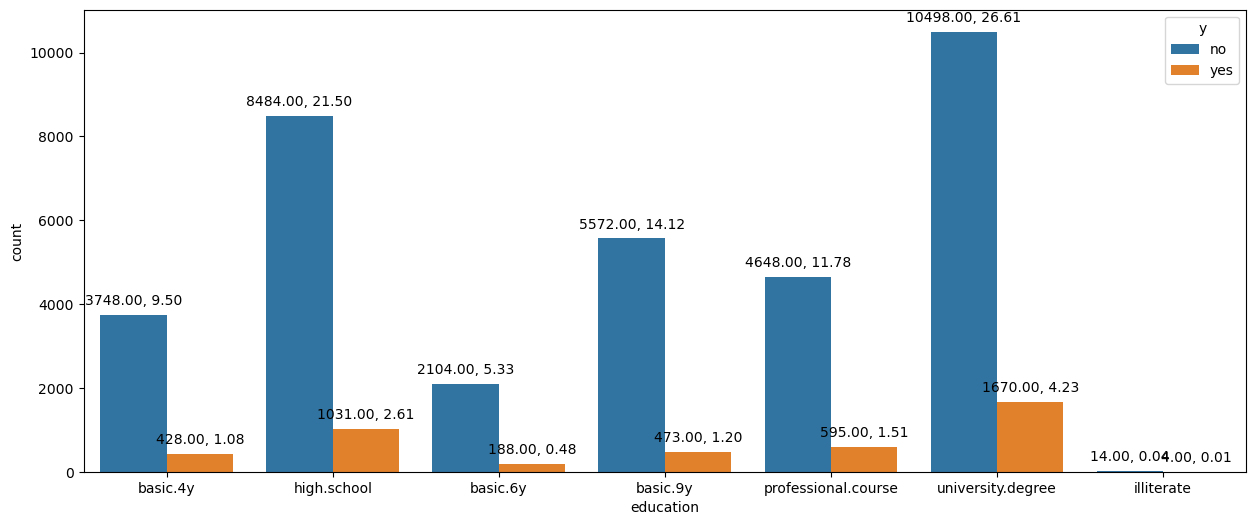

Default


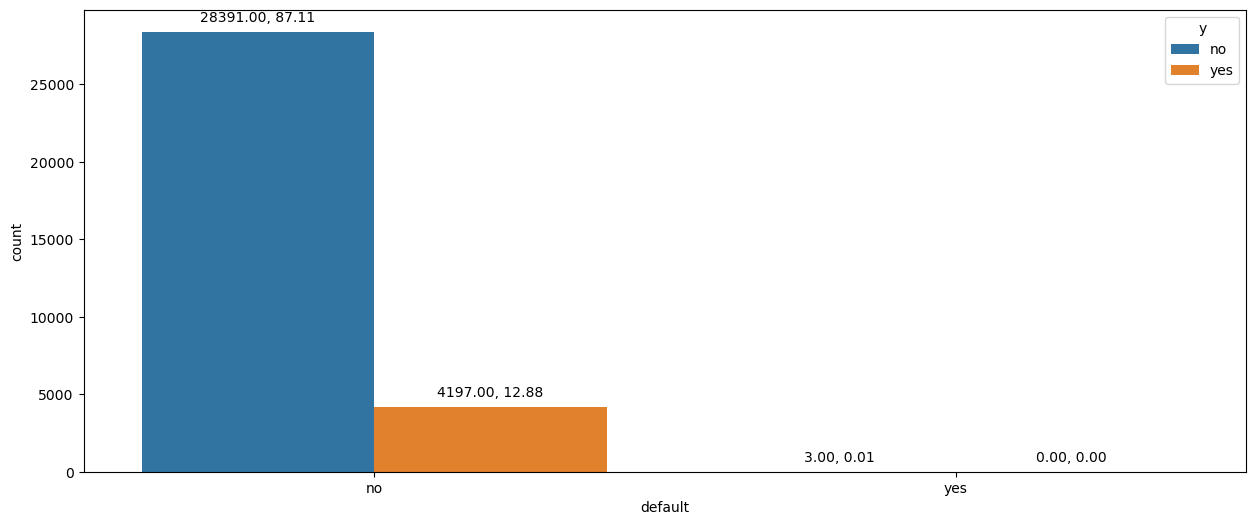

Housing


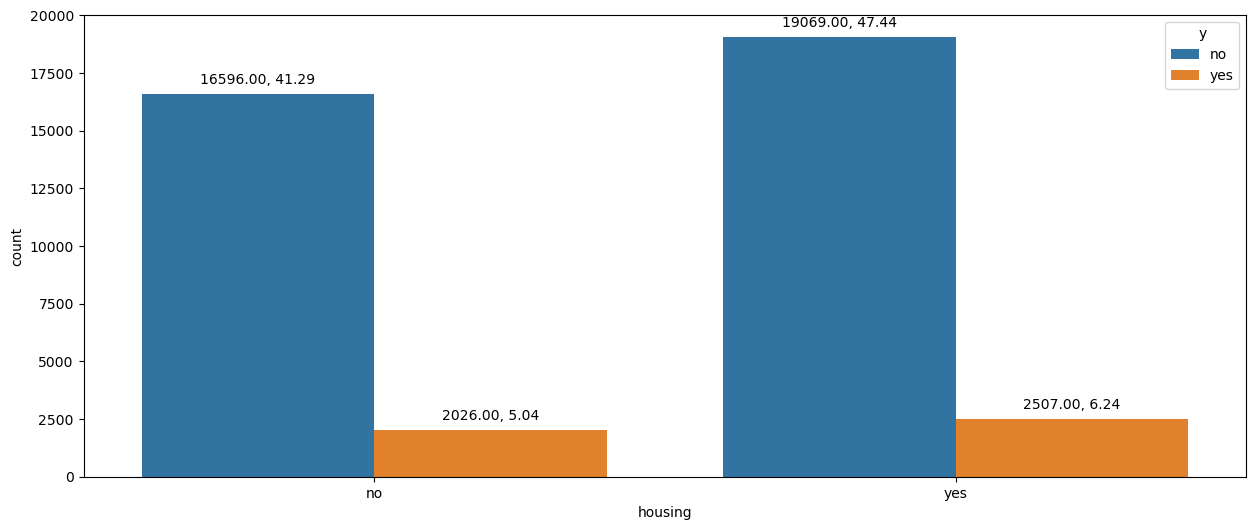

Loan


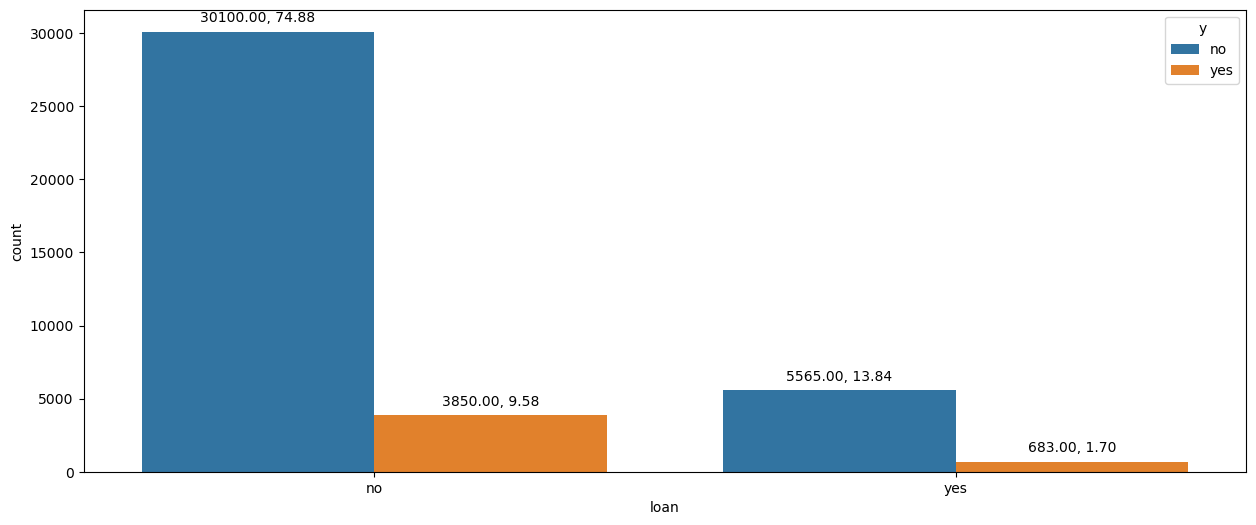

Contact


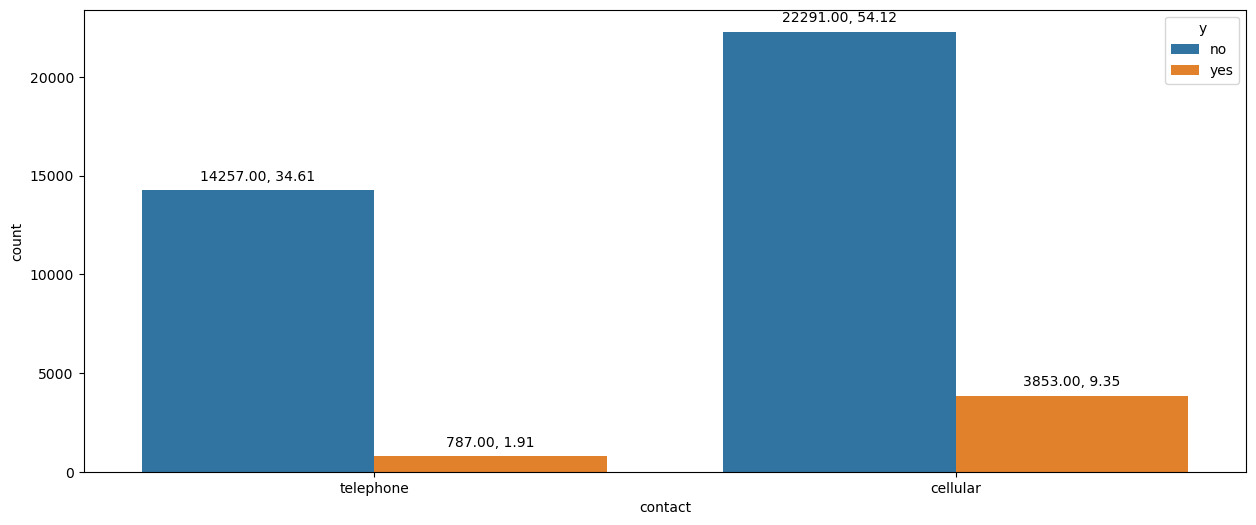

Month


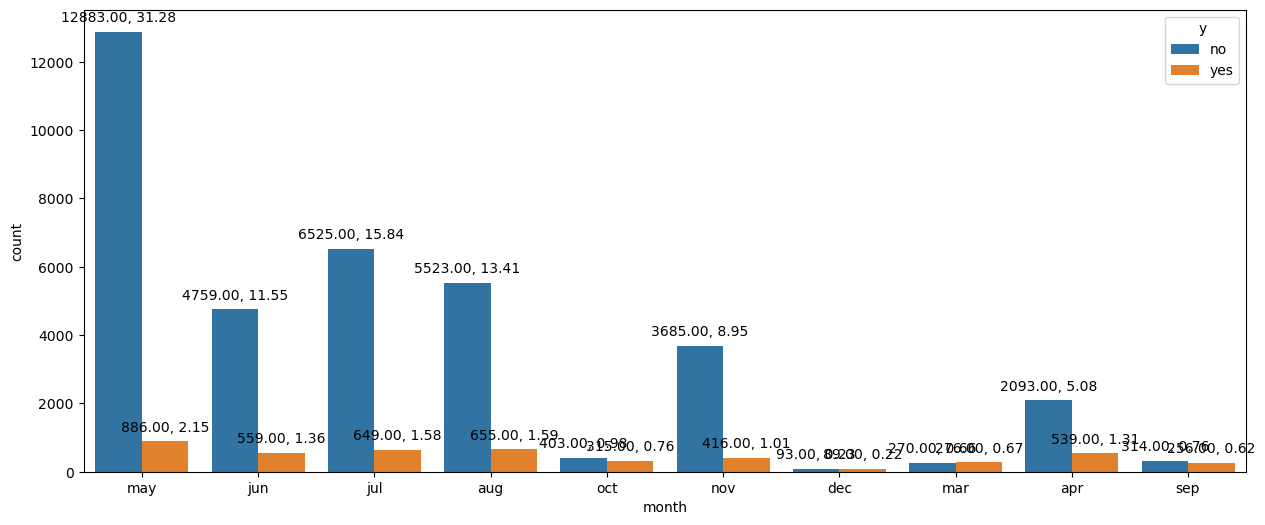

Day_Of_Week


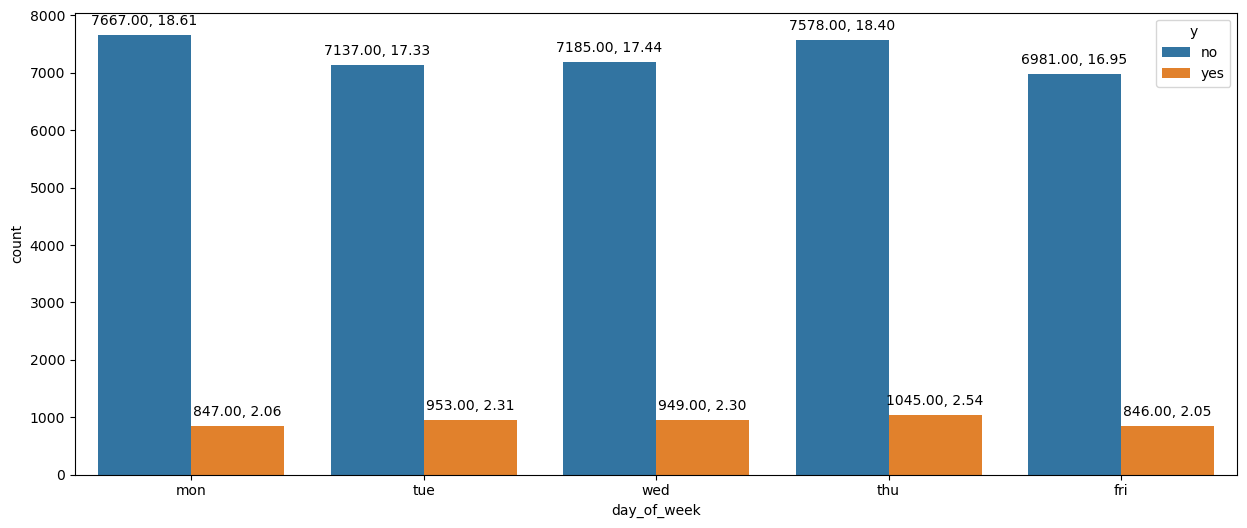

Poutcome


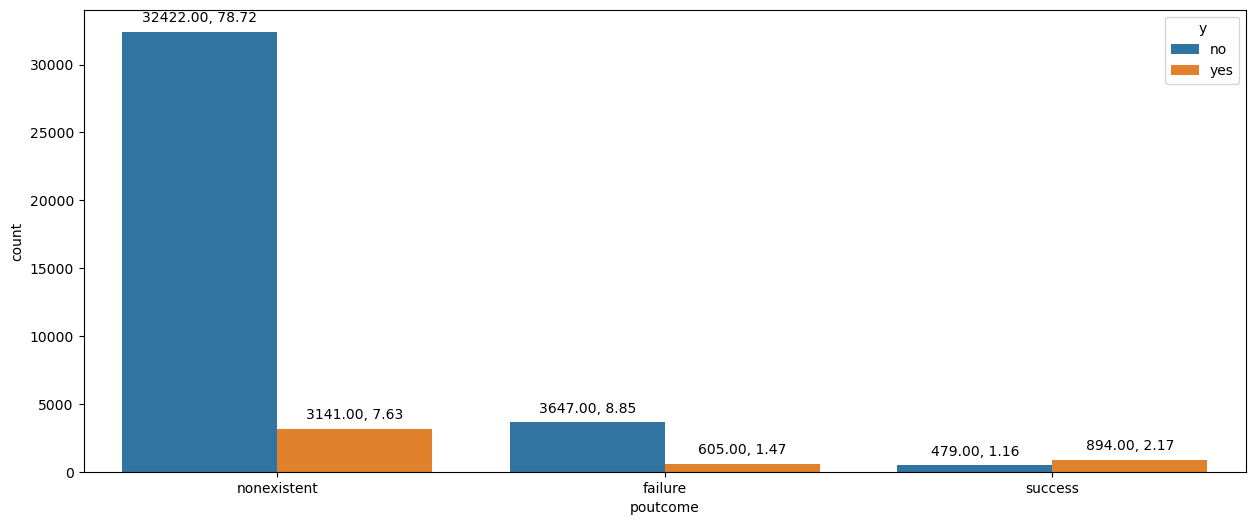

In [12]:
for column in categorical_var:
    plt.figure(figsize=(15,6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue = df['y'])
    label_values(ax)
    plt.show()

## Comment on categorical variables
- Job: The largest propotion of customers belong to admin with 25,51%. Also, student makes up a tiny proportion of customers but it witnesses highest conversion rate with 45,83% 
- Martial: 60,64% customers was marrried
- Education: Most of customers have high level of education (24,11 for high school, 31,84 for university degree). Also the higher level of education is, the more likely they subscribe the term deposit
- Default: the information that customers have credit or not doesn't influence the output. Because we have very small data that customers have credit and all of them don't take credit term
- Housing: Housing loan does not have much effect on the number of term deposits purchased.(approximately the same proportion for two responses)
- Loan: the majority of available customers don't have the personal loan (84,46%) and they have the higher ability of pruchasing the term deposits
- Contact: customers contact via mobile phone (63.47%) are more likely to subscribe the term deposit in comparision to telephone
- Month: almost customers contact with the bank in May (33,43%). Futhermore, the bank didn't have any activities in January and Febuary. Also, the conversion rate was almost same in June, July and August.
- Day of week: there are no significant differences among days of week.
- Poutcome: the large proportion of customers of the bank weren't approached from previous marketing campaigns. Also, the customers who have already subscirbed the term deposit before have a higher ability to resign the new term deposit.


In [13]:
# Removing default
df.drop("default", axis = 1, inplace = True) 
categorical_var.remove('default')
print(categorical_var)

['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


Because the number of missing values are relative small as comparision to total observation, these rows should be removed from data set

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null  floa

2. Numerical Variables

Note: Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [16]:
# Removing duration
duration = df["duration"]
df.drop("duration", axis = 1, inplace = True )
numerical_var.remove('duration')

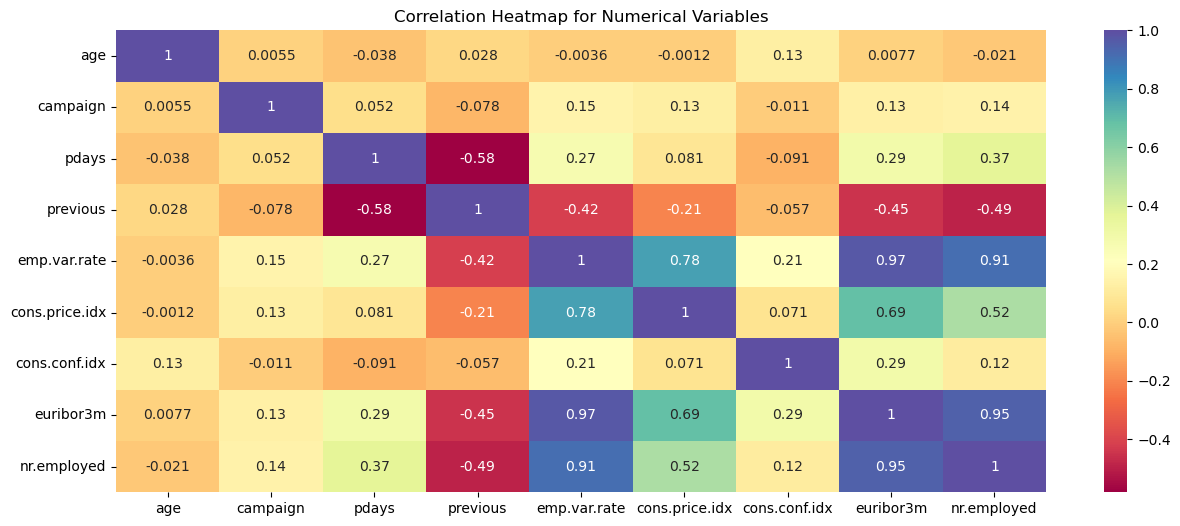

In [17]:
# Selecting only numeric columns from the DataFrame based on numerical_vars
numeric_df = df[numerical_var]

# Plotting the correlation heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Spectral')
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

Based on the heat map, we can see the highly correlated between 3 features including euribor3m, nr.employed, emp.var.rate.
To avoid multicollinearity, we will drop 2 of 3 features

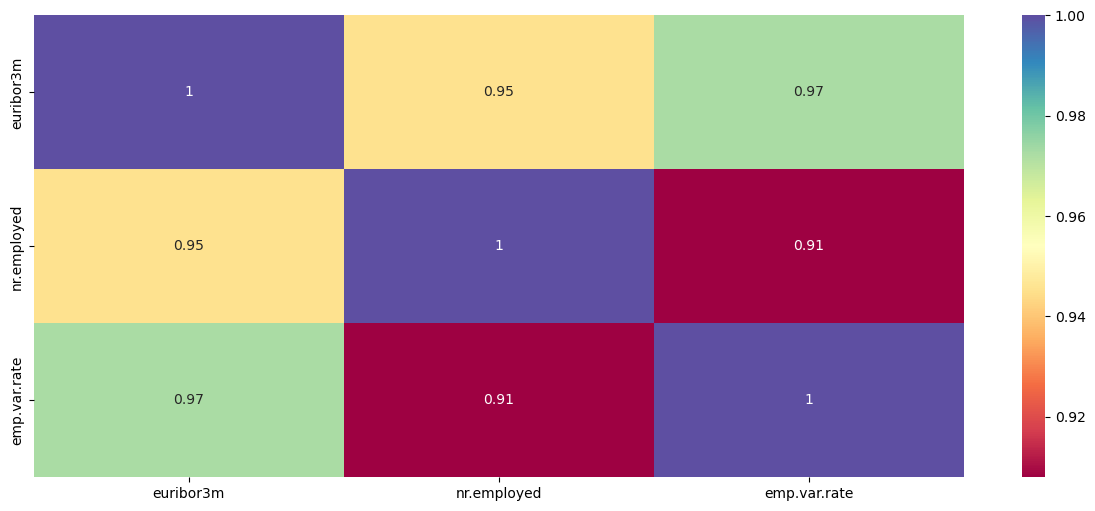

In [18]:
plt.figure(figsize=(15, 6))
sns.heatmap(df[['euribor3m', 'nr.employed', 'emp.var.rate']].corr(), annot=True, cmap='Spectral')
plt.show()

Euribor3m (Euro InterBank Offered Rate) is the average interest rate at which a selection of banks provide one another with short-term loans in euros.

'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor.

In [19]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
numerical_var.remove('nr.employed')
numerical_var.remove('emp.var.rate')
print(numerical_var)

['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


Age


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


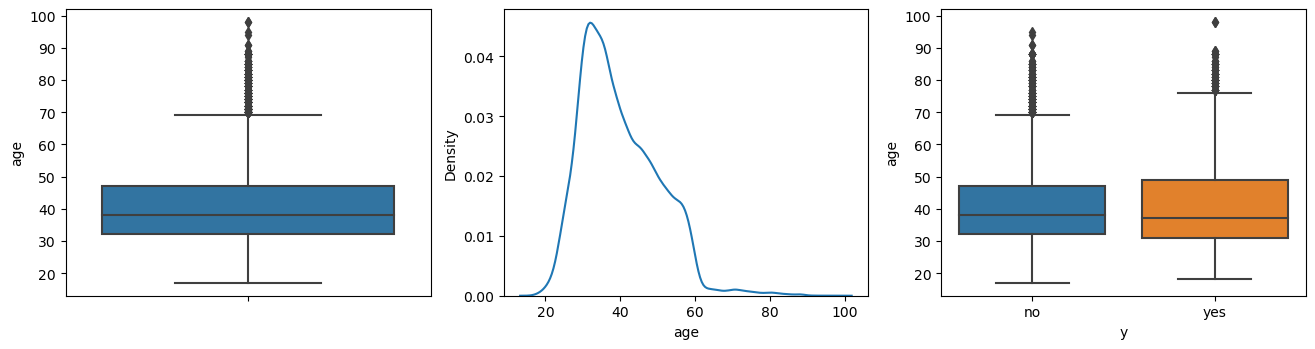

Campaign


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


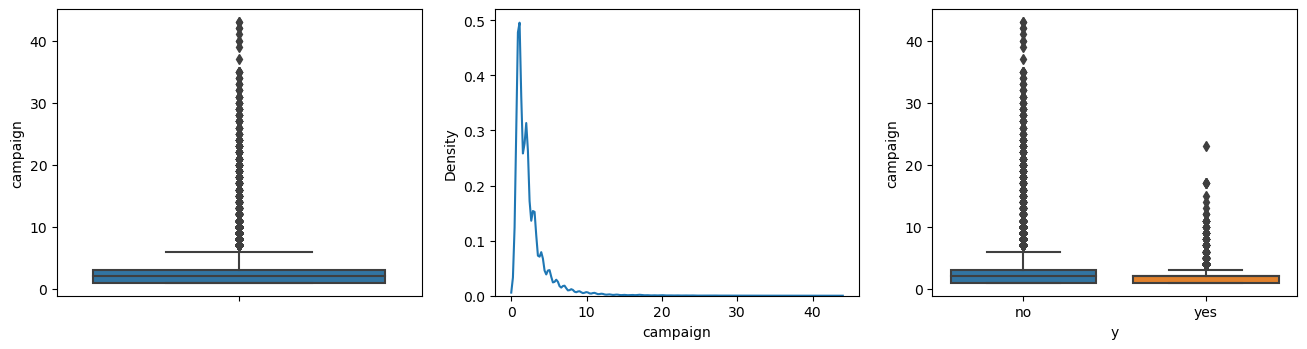

Pdays


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


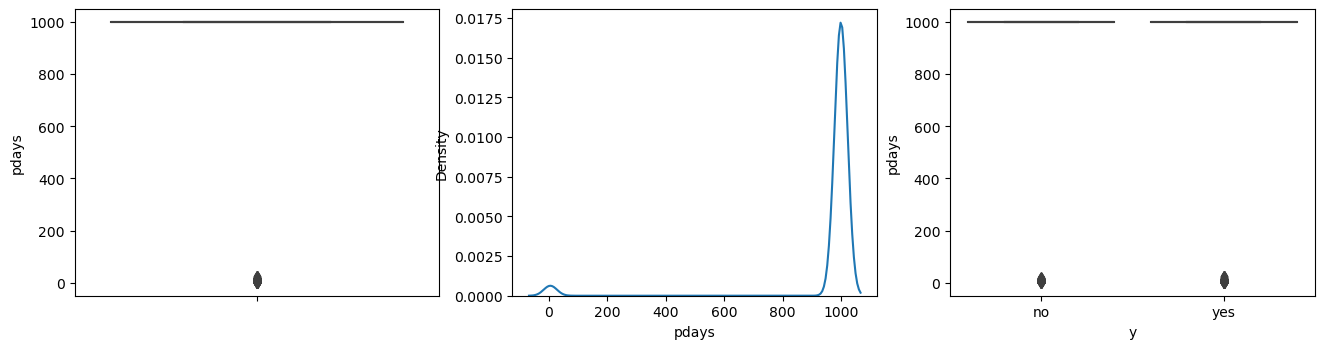

Previous


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


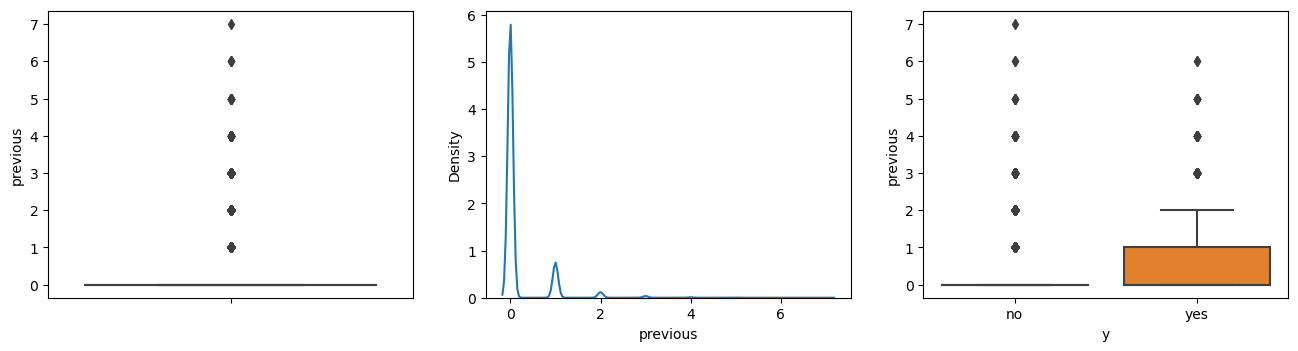

Cons.Price.Idx


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


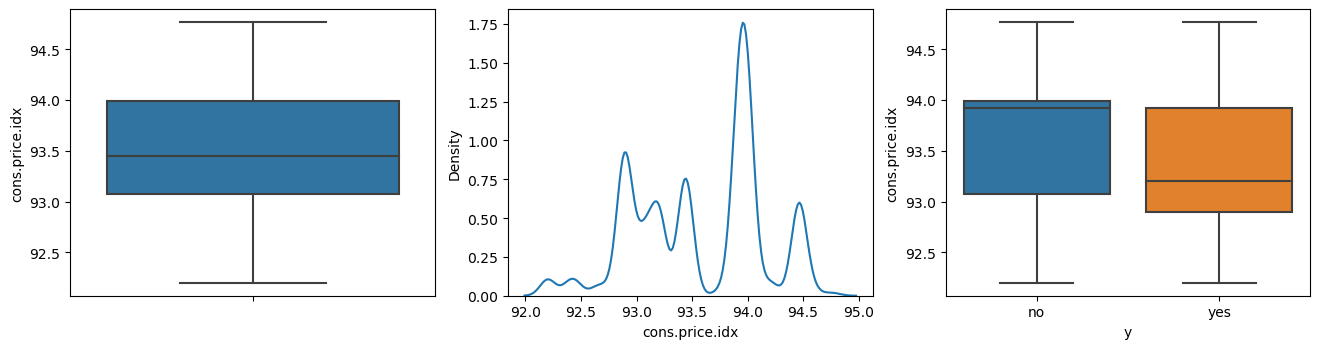

Cons.Conf.Idx


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


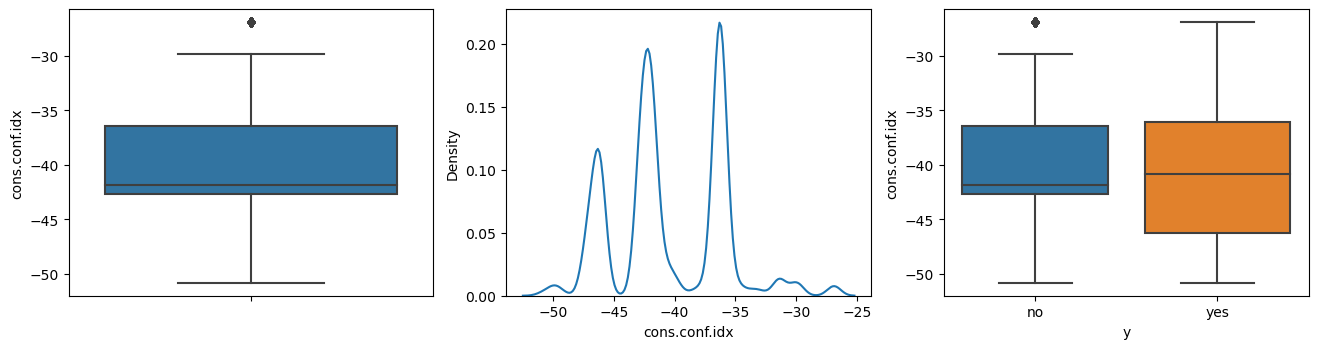

Euribor3M


/var/folders/pg/k06k44dj0cz2xxcs3w0mjm200000gn/T/ipykernel_2548/3522275799.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(numerical_var) + 1, 3, i)


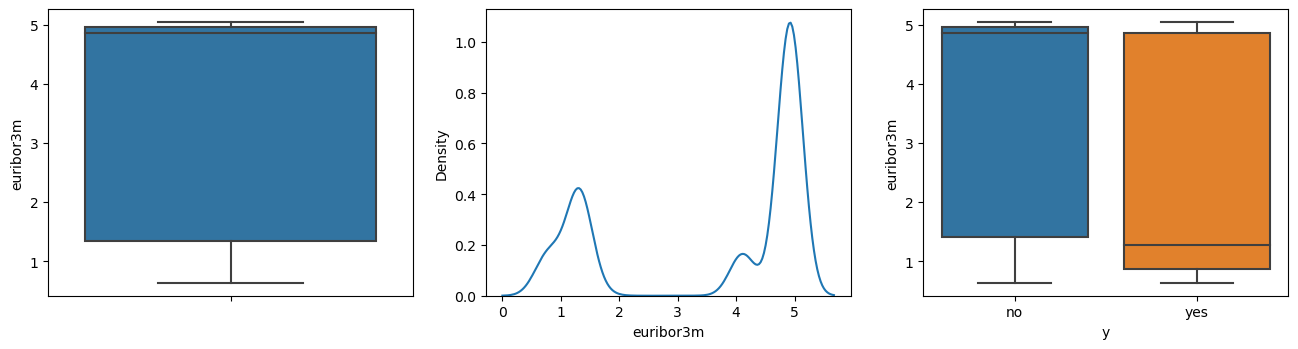

In [20]:
i = 1
for column in numerical_var:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(numerical_var) + 1, 3, i)
    sns.boxplot(y= df[column])
    i += 1
    plt.subplot(len(numerical_var) + 1, 3, i)
    sns.kdeplot(x= df[column])
    i += 1
    plt.subplot(len(numerical_var) + 1, 3, i)
    sns.boxplot(x= df['y'], y= df[column] )
    i += 1
    plt.show()
    
    

In [21]:
df[numerical_var].describe()

age      campaign         pdays      previous  cons.price.idx  \
count  38245.000000  38245.000000  38245.000000  38245.000000    38245.000000   
mean      39.860871      2.566662    963.531651      0.170009       93.570313   
std       10.289488      2.767473    184.295254      0.487169        0.576367   
min       17.000000      1.000000      0.000000      0.000000       92.201000   
25%       32.000000      1.000000    999.000000      0.000000       93.075000   
50%       38.000000      2.000000    999.000000      0.000000       93.444000   
75%       47.000000      3.000000    999.000000      0.000000       93.994000   
max       98.000000     43.000000    999.000000      7.000000       94.767000   

       cons.conf.idx     euribor3m  
count   38245.000000  38245.000000  
mean      -40.541164      3.623298  
std         4.623200      1.730226  
min       -50.800000      0.634000  
25%       -42.700000      1.344000  
50%       -41.800000      4.857000  
75%       -36.400000      4.961000  
max       -26.900000      5.045000

Look into 'campaign', 'age',  'previous', 'cons.conf.idx', 'pdays'

In [22]:
print(df["campaign"].quantile(0.05), len(df[df["campaign"] < df["campaign"].quantile(0.05)]))
print(df["campaign"].quantile(0.95), len(df[df["campaign"] > df["campaign"].quantile(0.95)]))

1.0 0
7.0 1636


As you can see at campaign, for 95% quantile the value is 7 and we have 1636 data points which extremly high in comparision to the mean value 2,57 (max is 43). Therefore, we could consider these data points as outliers.

Looking at campaign's box plot, you could realise that most of outliers say 'no' to take the term deposits.

In [23]:
z = 7
while z <= 20:
    df1 = df[(df["campaign"] >= z) & (df["y"] == 'yes')]
    print(f"{z}. {len(df1)}")
    print(len(df1)/len(df[(df["campaign"] > z)])*100)
    z+= 1


7. 100
6.112469437652812
8. 65
5.1424050632911396
9. 49
4.870775347912525
10. 33
4.130162703379224
11. 23
3.6334913112164293
12. 11
2.1235521235521233
13. 8
1.809954751131222
14. 7
1.8518518518518516
15. 6
1.812688821752266
16. 5
1.7482517482517483
17. 5
2.1551724137931036
18. 1
0.4975124378109453
19. 1
0.5617977528089888
20. 1
0.6756756756756757


Given that a relatively small number of customers who were contacted more than 10 times agreed to subscribe to a term deposit, we will cap the 'campaign' values at 10. This means any recorded contacts above 10 will be adjusted 



In [24]:
df["campaign"] = df["campaign"].apply(lambda x: 10 if x > 10 else x)

In [25]:
print(df["age"].quantile(0.05), len(df[df["age"] < df["age"].quantile(0.05)]))
print(df["age"].quantile(0.95), len(df[df["age"] > df["age"].quantile(0.95)]))

26.0 1484
58.0 1435


/Users/nguyenminhhieu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


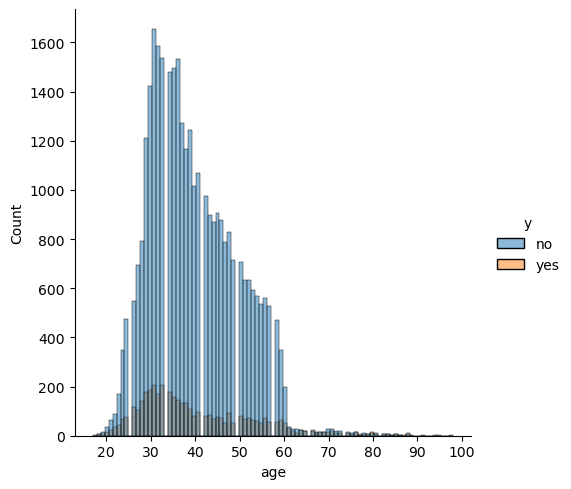

In [26]:
sns.displot(x = 'age', hue='y', data=df)
plt.show()

In [27]:
print(df["previous"].quantile(0.05), len(df[df["previous"] < df["previous"].quantile(0.05)]))
print(df["previous"].quantile(0.95), len(df[df["previous"] > df["previous"].quantile(0.95)]))

0.0 0
1.0 945


In [28]:
z = 1
while z <= 6:
    df1 = df[(df["previous"] >= z) & (df["y"] == 'yes')]
    print(f"z = {z}: {len(df1)}")
    print(len(df1)/len(df[(df["previous"] >= z)])*100)
    z+= 1

z = 1: 1336
25.796485808071058
z = 2: 466
49.31216931216931
z = 3: 160
58.60805860805861
z = 4: 43
55.12820512820513
z = 5: 13
61.904761904761905
z = 6: 2
40.0


With this we can see that when previous is equal or above 2, the percentage of customers subscribe the term of deposit is aproximately 50%

Therefore, we will convert data point in previous which above 2 to 2

In [29]:
df["previous"] = df["previous"].apply(lambda x: 2 if x >= 2 else x)

In [30]:
print(df["pdays"].quantile(0.05), len(df[df["pdays"] < df["pdays"].quantile(0.05)]))
print(df["pdays"].quantile(0.95), len(df[df["pdays"] > df["pdays"].quantile(0.95)]))

999.0 1366
999.0 0


In [31]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


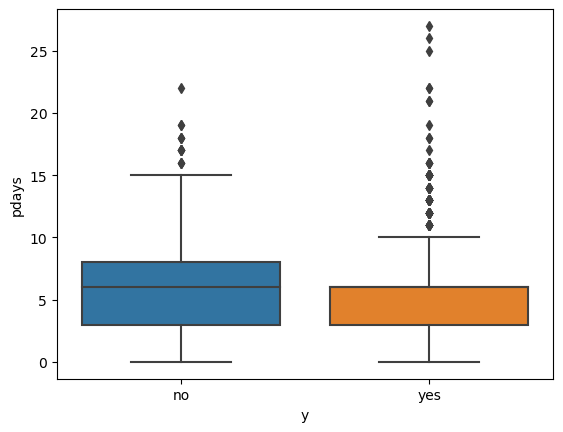

In [32]:
df1= df[(df["pdays"] < 999)]
sns.boxplot(x=df1["y"], y = df1["pdays"])
plt.show()

/Users/nguyenminhhieu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


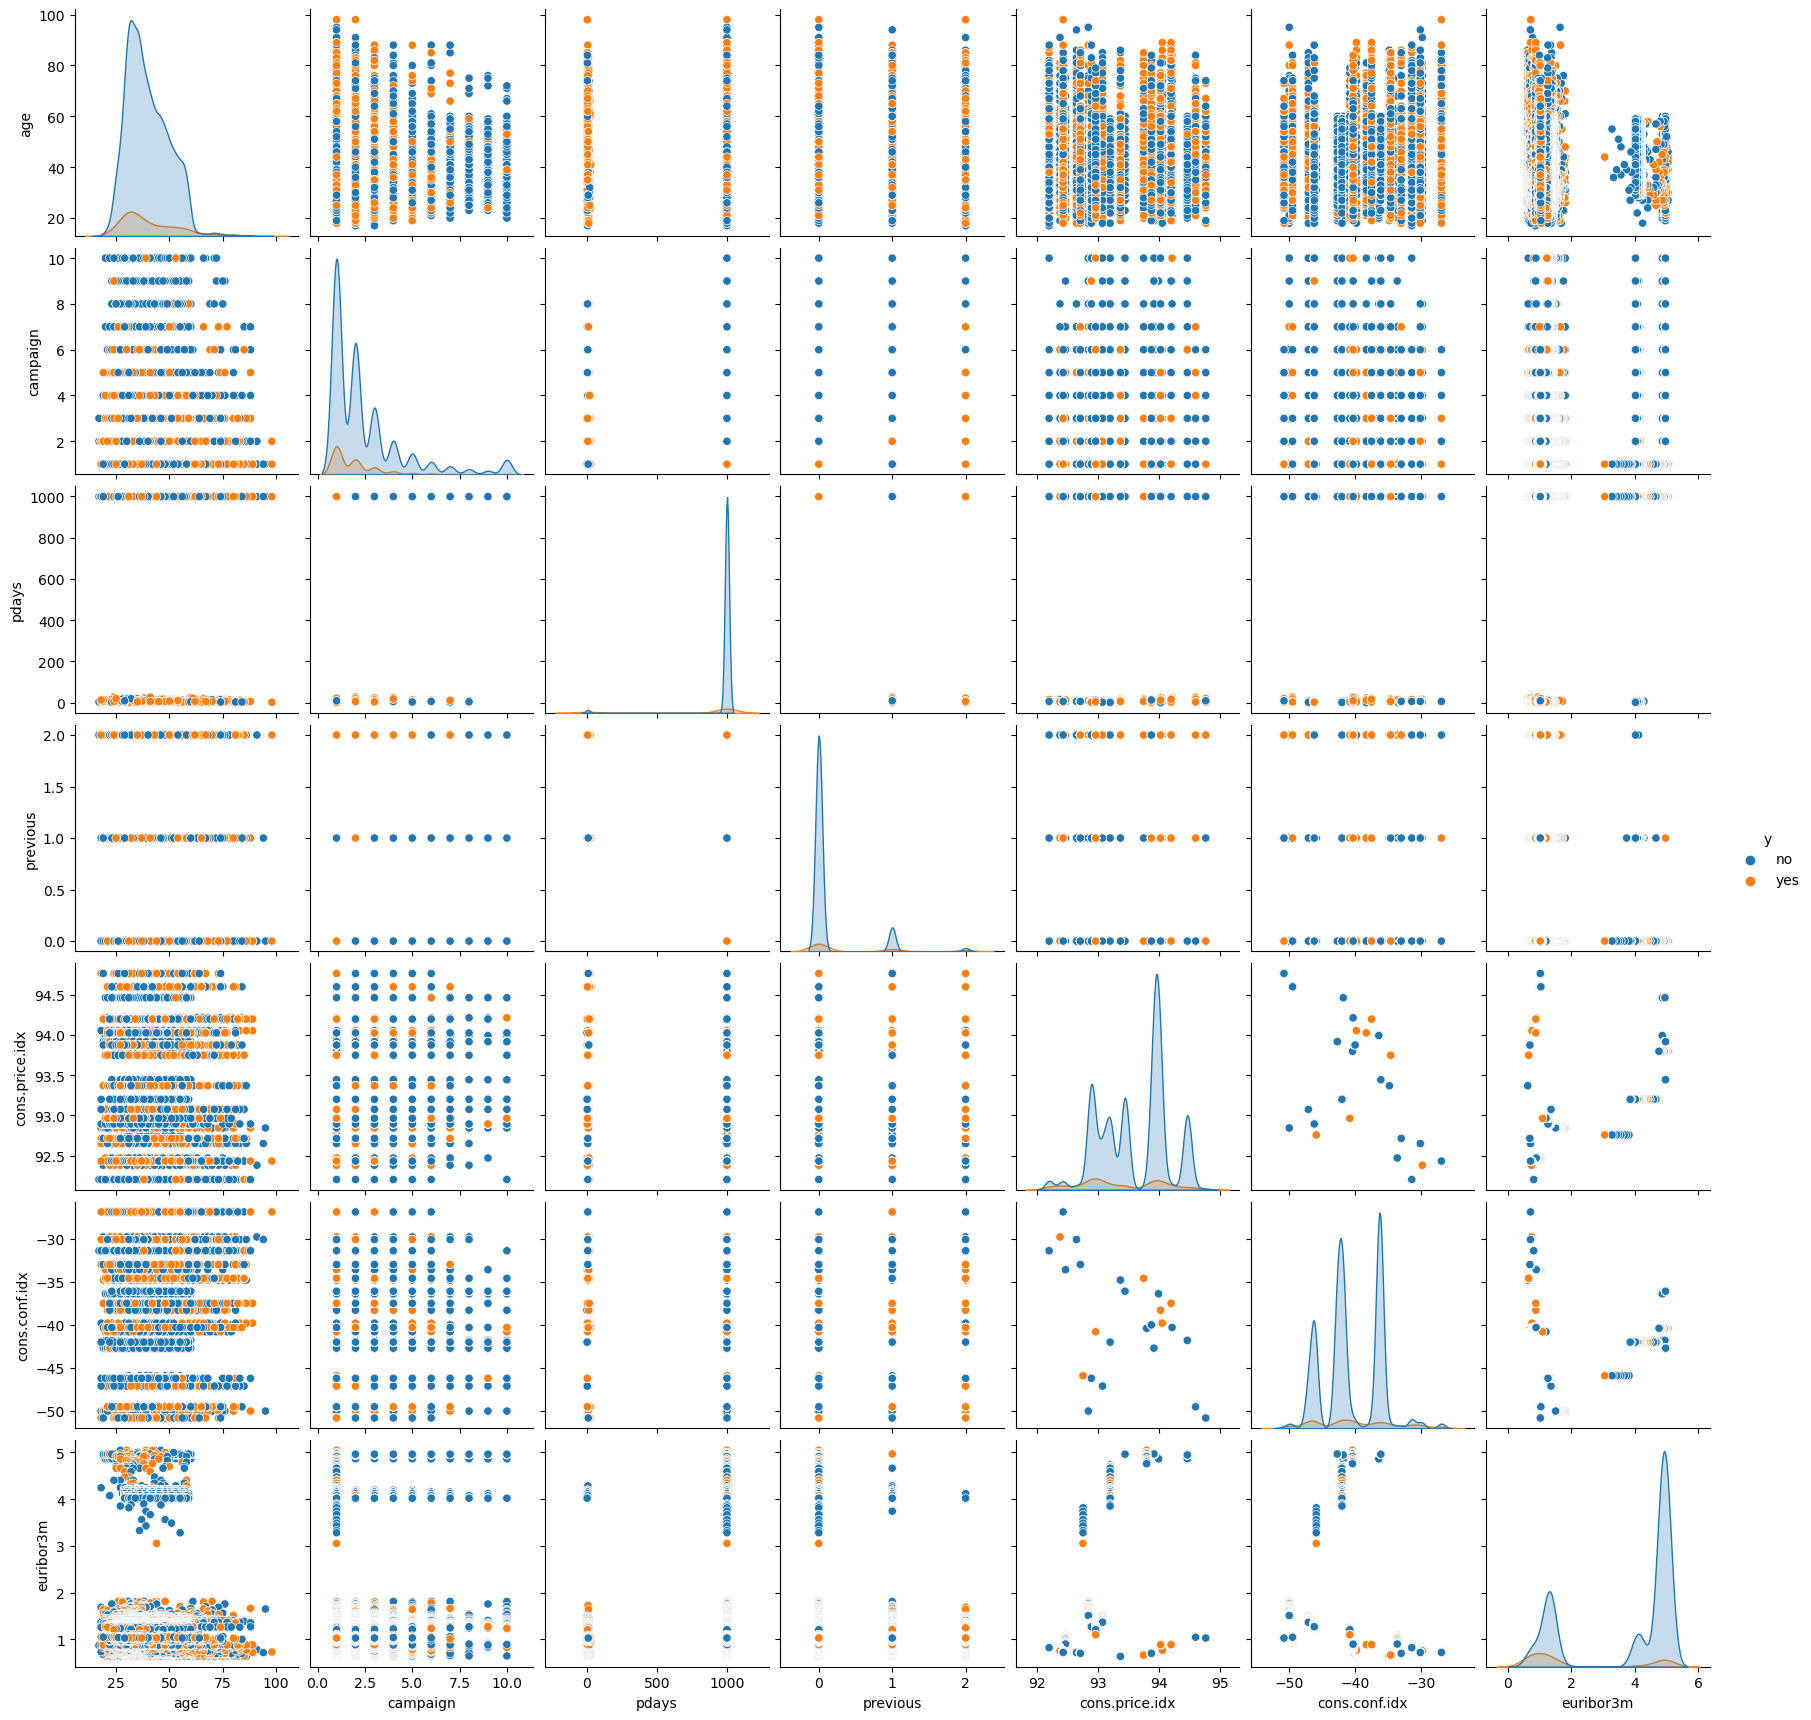

In [33]:
sns.pairplot(data = df, hue='y')
plt.show()

## Insight from numeric variables
- Campaign: if the number of contacts performed during the campaign is above 23, the percentage of customers subscribing to the term deposit will be very low. Even if we contact a person more than 8 times, the probability is still low. We will drop this column as it will not be known beforehand. But it is important to see that we should not contact any client more than 8 times during any campaign.
- Previous: if we contact customers 2 times before running the campaign, the possibility of accepting the term deposit will be considerably increased (about 50%)
- Pday: if we start contacting customers 1 month before the campaign, customers will be more likely to take the term deposit
- Cons.price.idx: The higher consumer price index is, the lower the possibility of subscribing to the term deposit is
- euribor.3m: if the average interest rate increases, the high chances of clients not subscribing to the term deposit

In [34]:
df.drop(['campaign'], axis = 1, inplace=True)
numerical_var.remove('campaign')

In [35]:
df.isnull().sum()/len(df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   pdays           38245 non-null  int64  
 10  previous        38245 non-null  int64  
 11  poutcome        38245 non-null  object 
 12  cons.price.idx  38245 non-null  float64
 13  cons.conf.idx   38245 non-null  float64
 14  euribor3m       38245 non-null  float64
 15  y               38245 non-null  object 
dtypes: float64(3), int64(3), object(10)
memory usage: 6.0+ MB


In [37]:
print(len(categorical_var), categorical_var)
print(len(numerical_var), numerical_var)

9 ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
6 ['age', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


In [38]:
print(df["loan"].value_counts())
print(df["housing"].value_counts())
print(df["contact"].value_counts())
print(df["y"].value_counts())

loan
no     32286
yes     5959
Name: count, dtype: int64
housing
yes    20578
no     17667
Name: count, dtype: int64
contact
cellular     24441
telephone    13804
Name: count, dtype: int64
y
no     33987
yes     4258
Name: count, dtype: int64


In [39]:
varlist = ['loan', 'housing', 'y']

df[varlist] = df[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

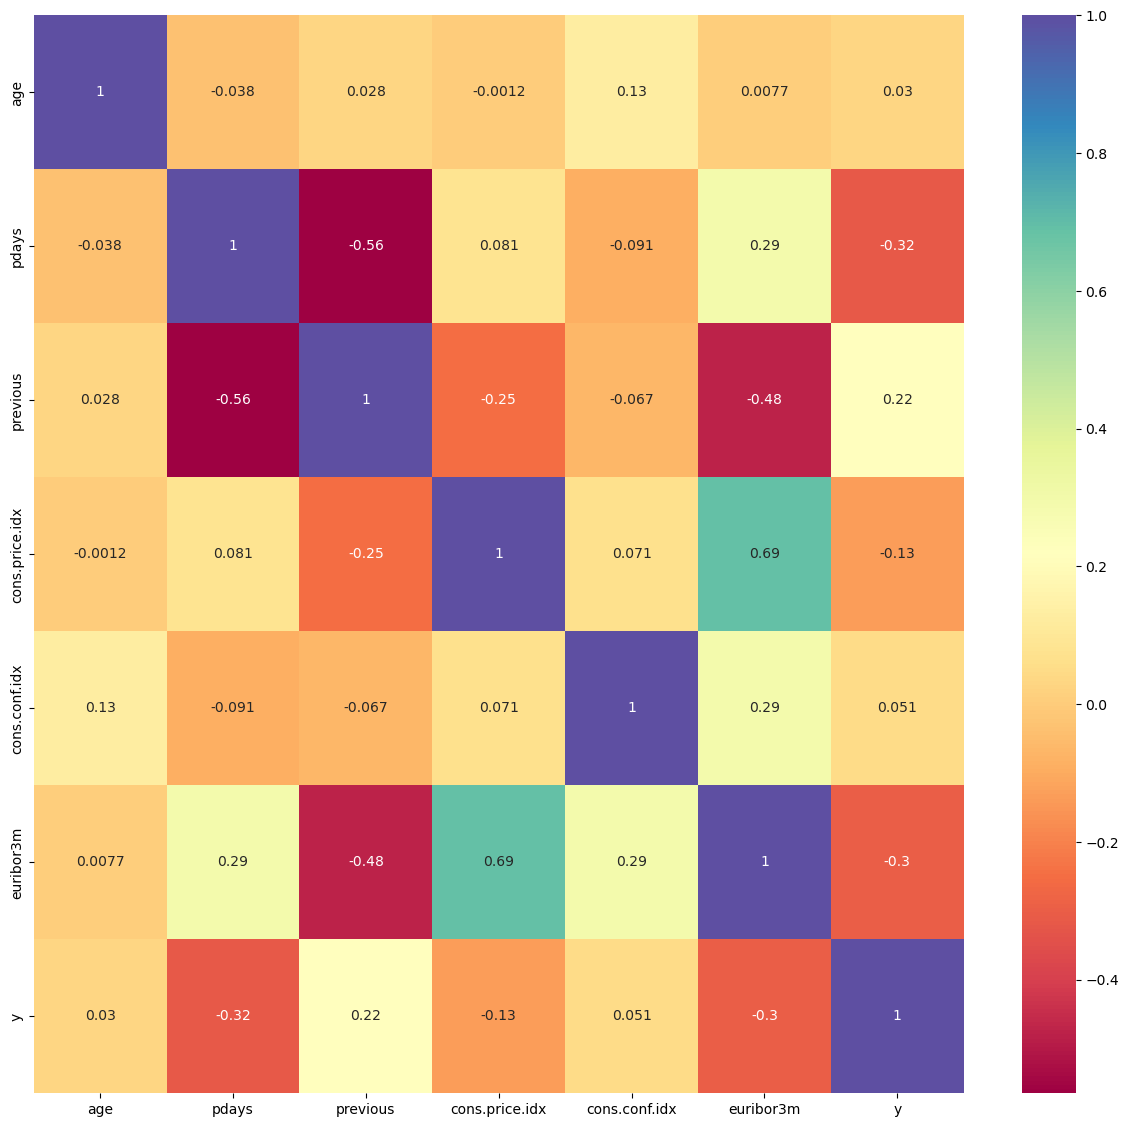

In [40]:
numeric_df = df[numerical_var].copy()
numeric_df.loc[:, 'y'] = df['y']

# Plotting the correlation heatmap
plt.figure(figsize=(15, 14))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Spectral')
plt.show()

/Users/nguyenminhhieu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


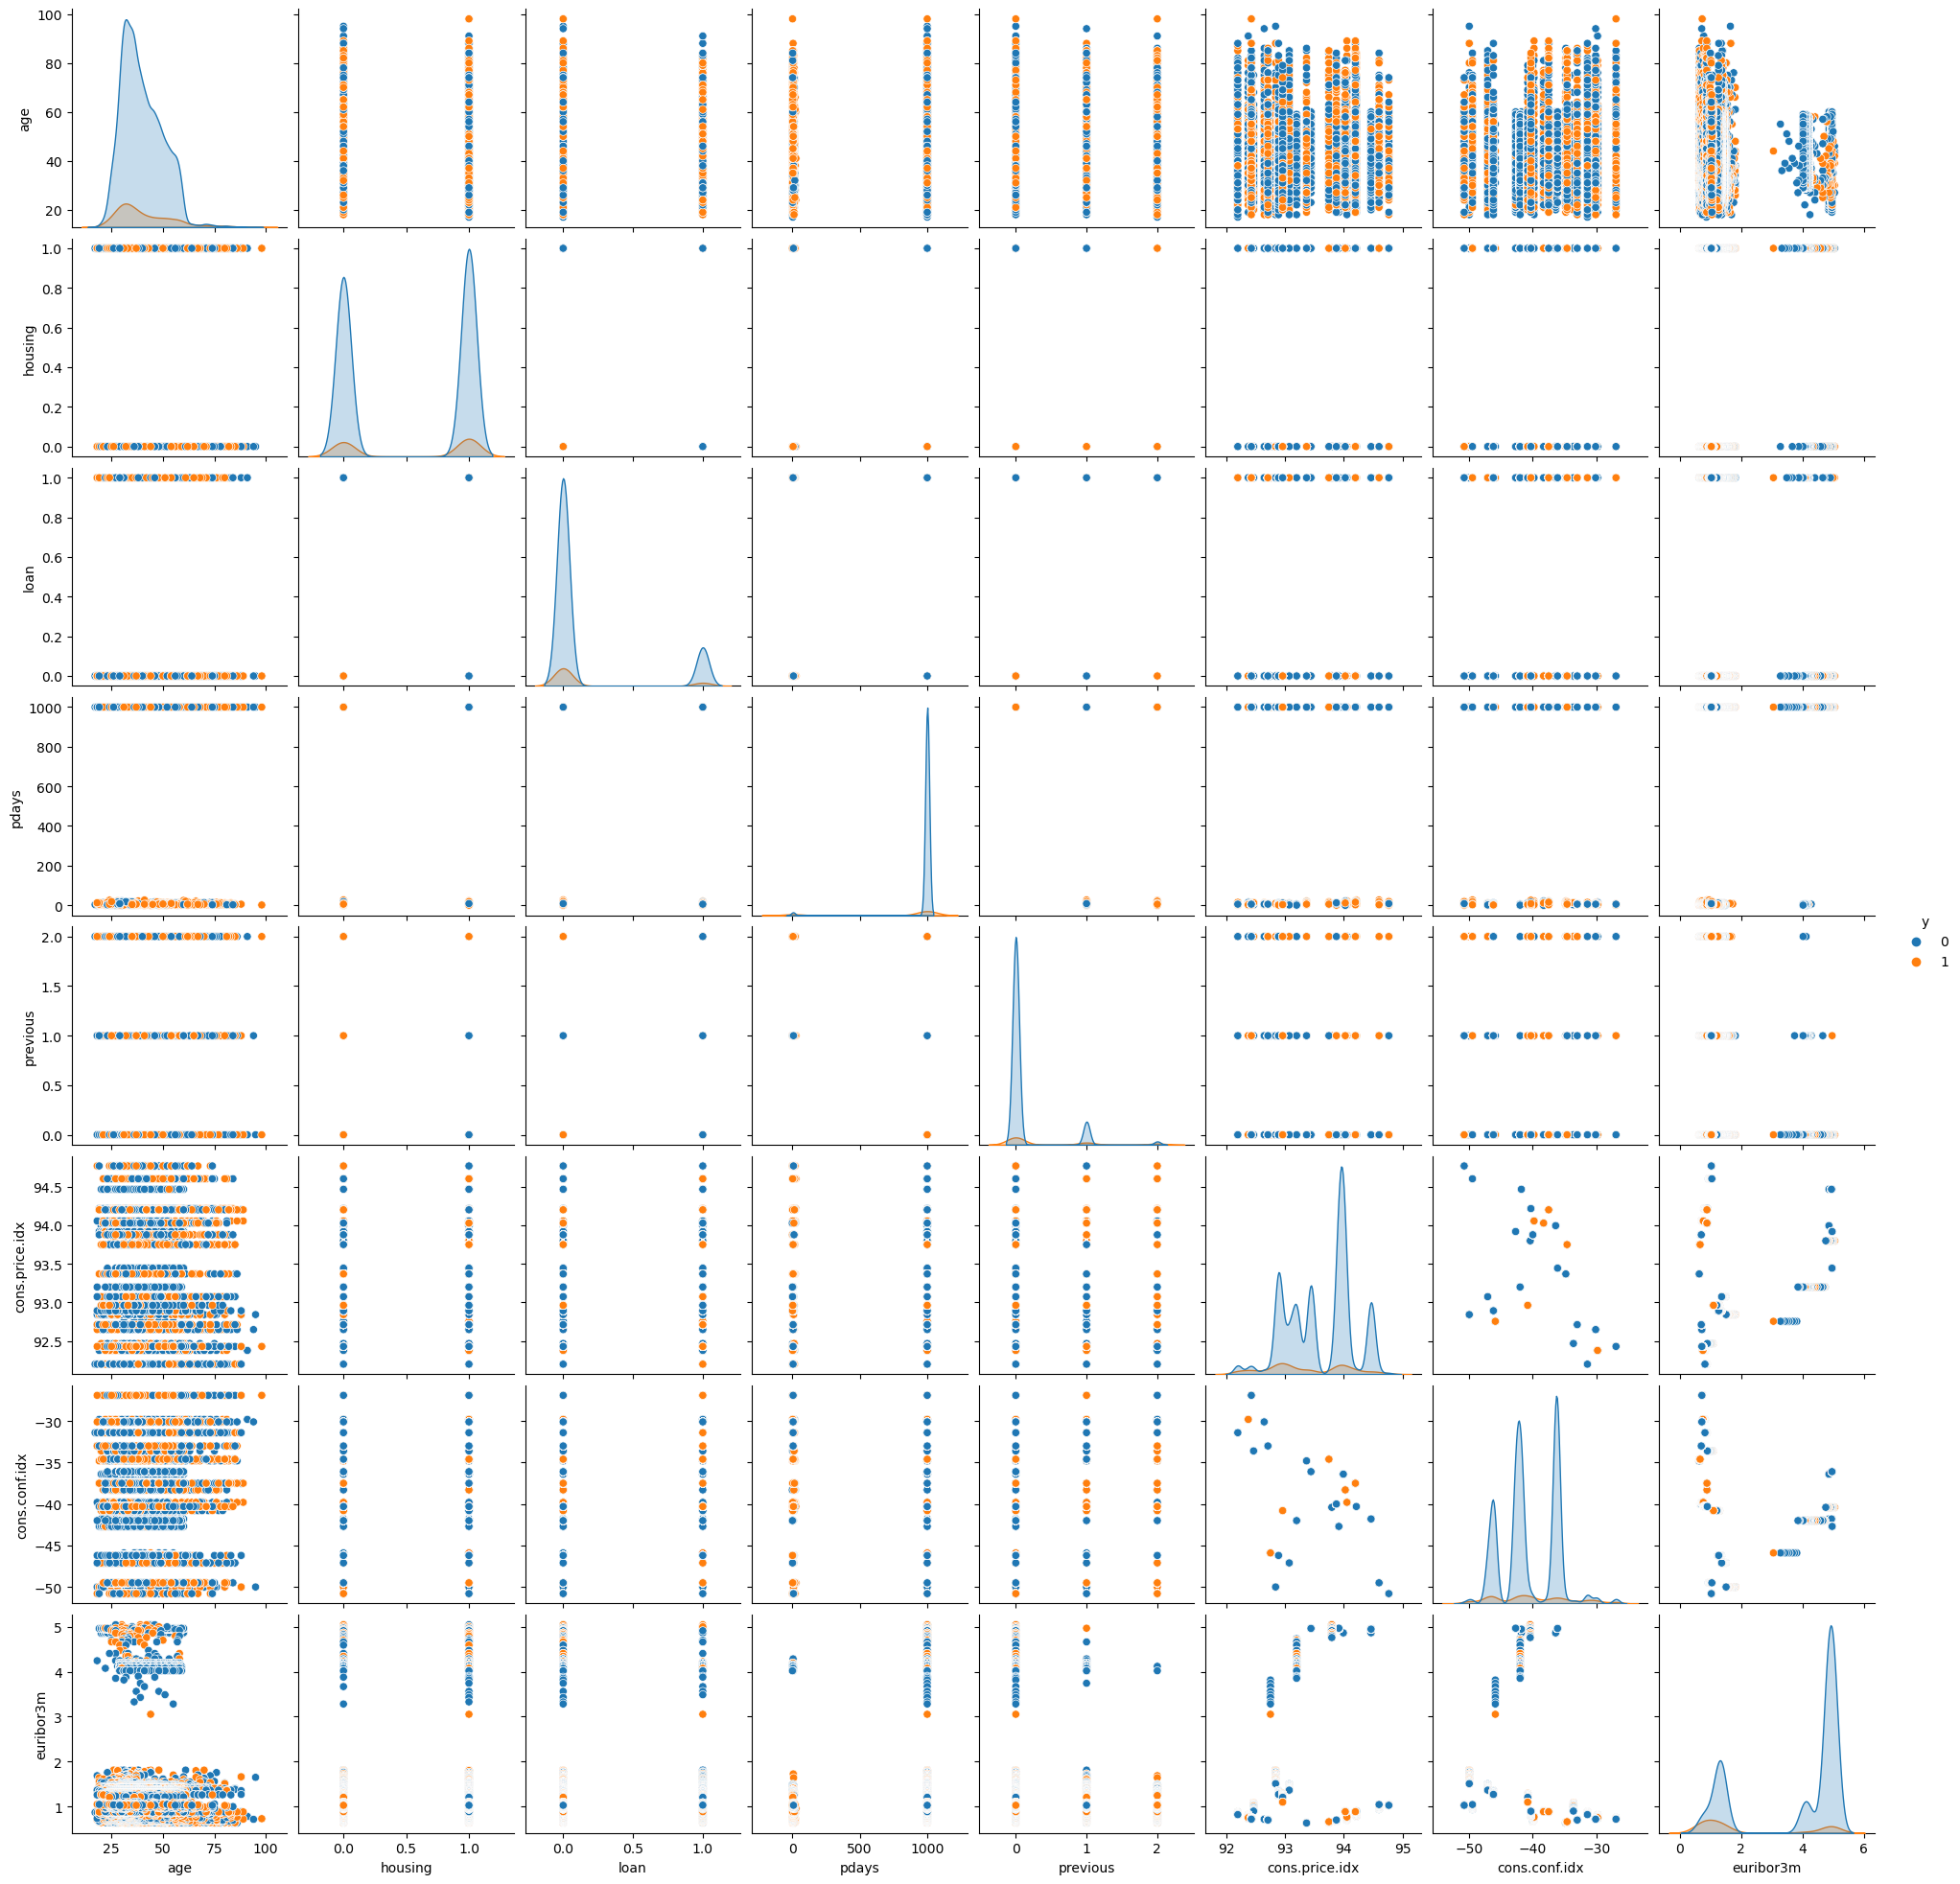

In [41]:
sns.pairplot(data = df, hue='y')
plt.show()

# V. One Hot Encoding

In [42]:
df = pd.get_dummies(df, columns = ["job", "marital", "education", "contact", 
                                           "month", "day_of_week", "poutcome"], 
                            drop_first = True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  int64  
 1   housing                        38245 non-null  int64  
 2   loan                           38245 non-null  int64  
 3   pdays                          38245 non-null  int64  
 4   previous                       38245 non-null  int64  
 5   cons.price.idx                 38245 non-null  float64
 6   cons.conf.idx                  38245 non-null  float64
 7   euribor3m                      38245 non-null  float64
 8   y                              38245 non-null  int64  
 9   job_blue-collar                38245 non-null  bool   
 10  job_entrepreneur               38245 non-null  bool   
 11  job_housemaid                  38245 non-null  bool   
 12  job_management                 38245 non-null  bool

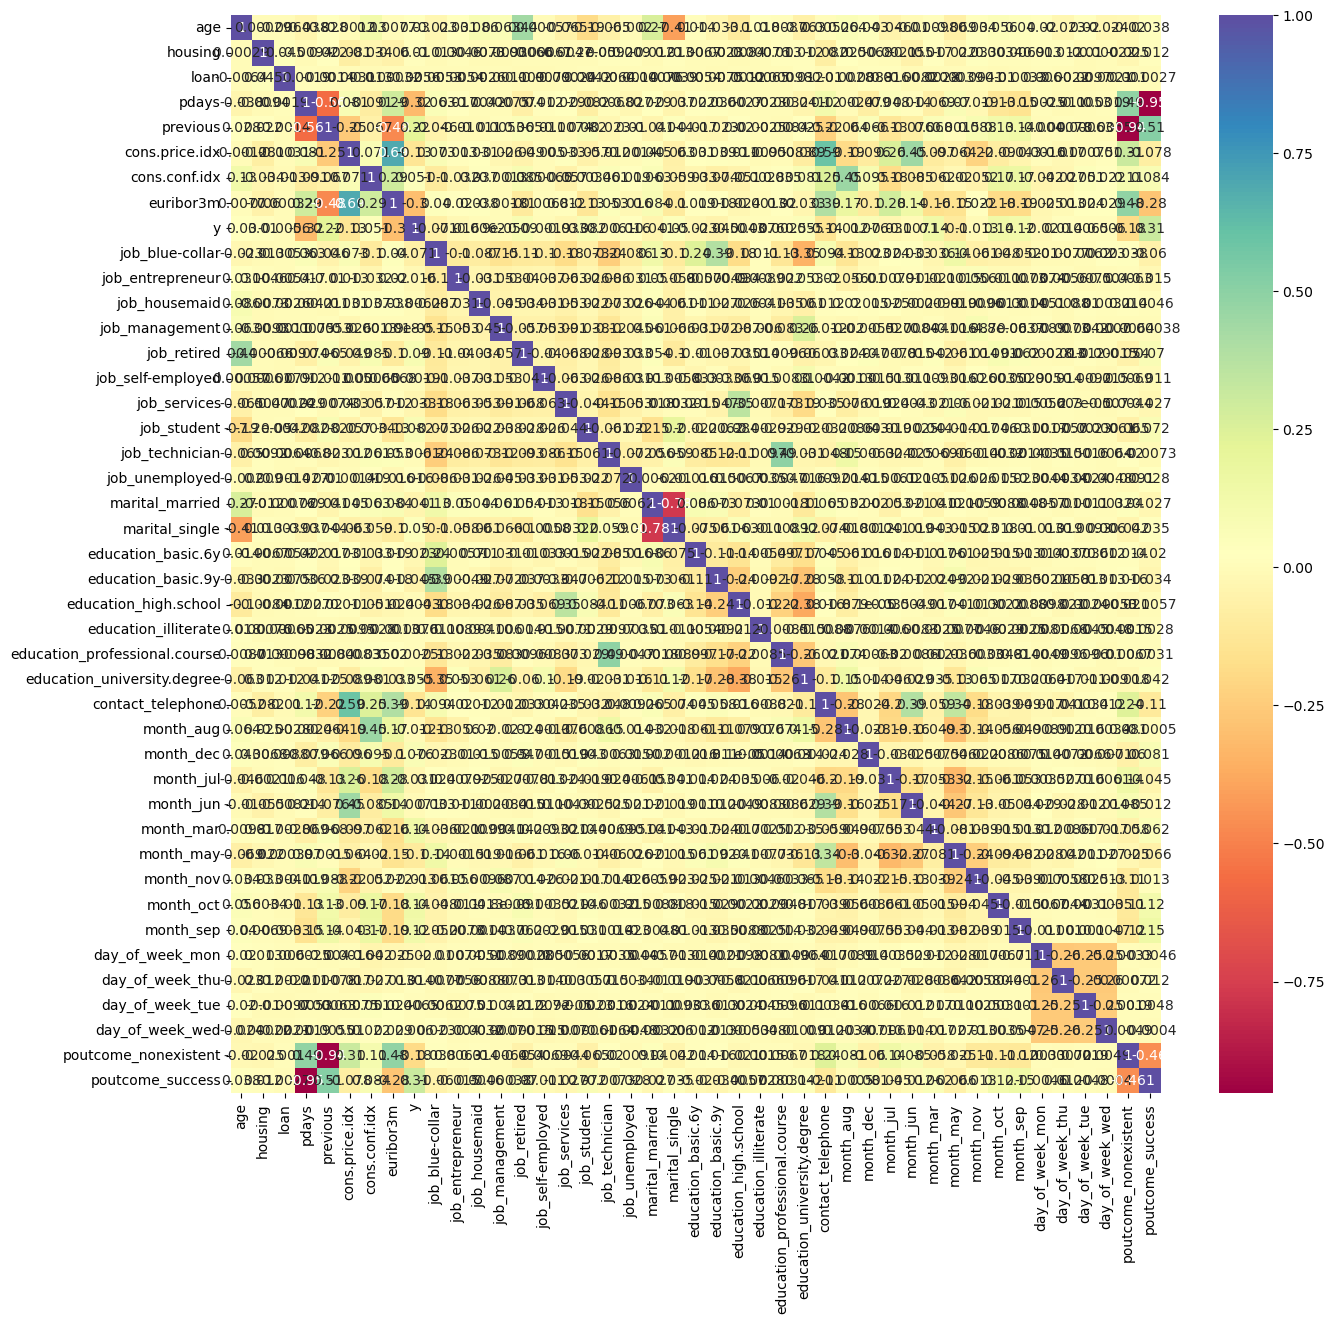

In [44]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

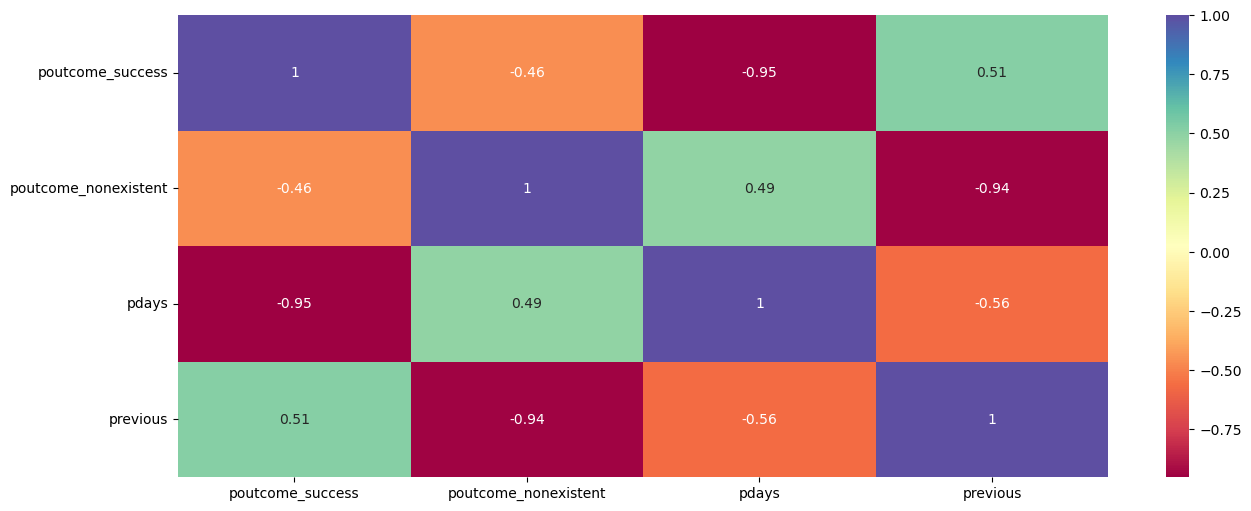

In [45]:
plt.figure(figsize=(15, 6))
sns.heatmap(df[['poutcome_success', 'poutcome_nonexistent', 'pdays', 'previous']].corr(), annot=True, cmap='Spectral')
plt.show()

 - Poutcome_succcess and pdays is highly negative correlation
 - poutcome_nonexistent and previous is highly negative correlation

In [46]:
df.drop("pdays", axis = 1, inplace = True)
df.drop("previous", axis = 1, inplace = True)

In [47]:
numerical_var.remove('pdays')
numerical_var.remove('previous')

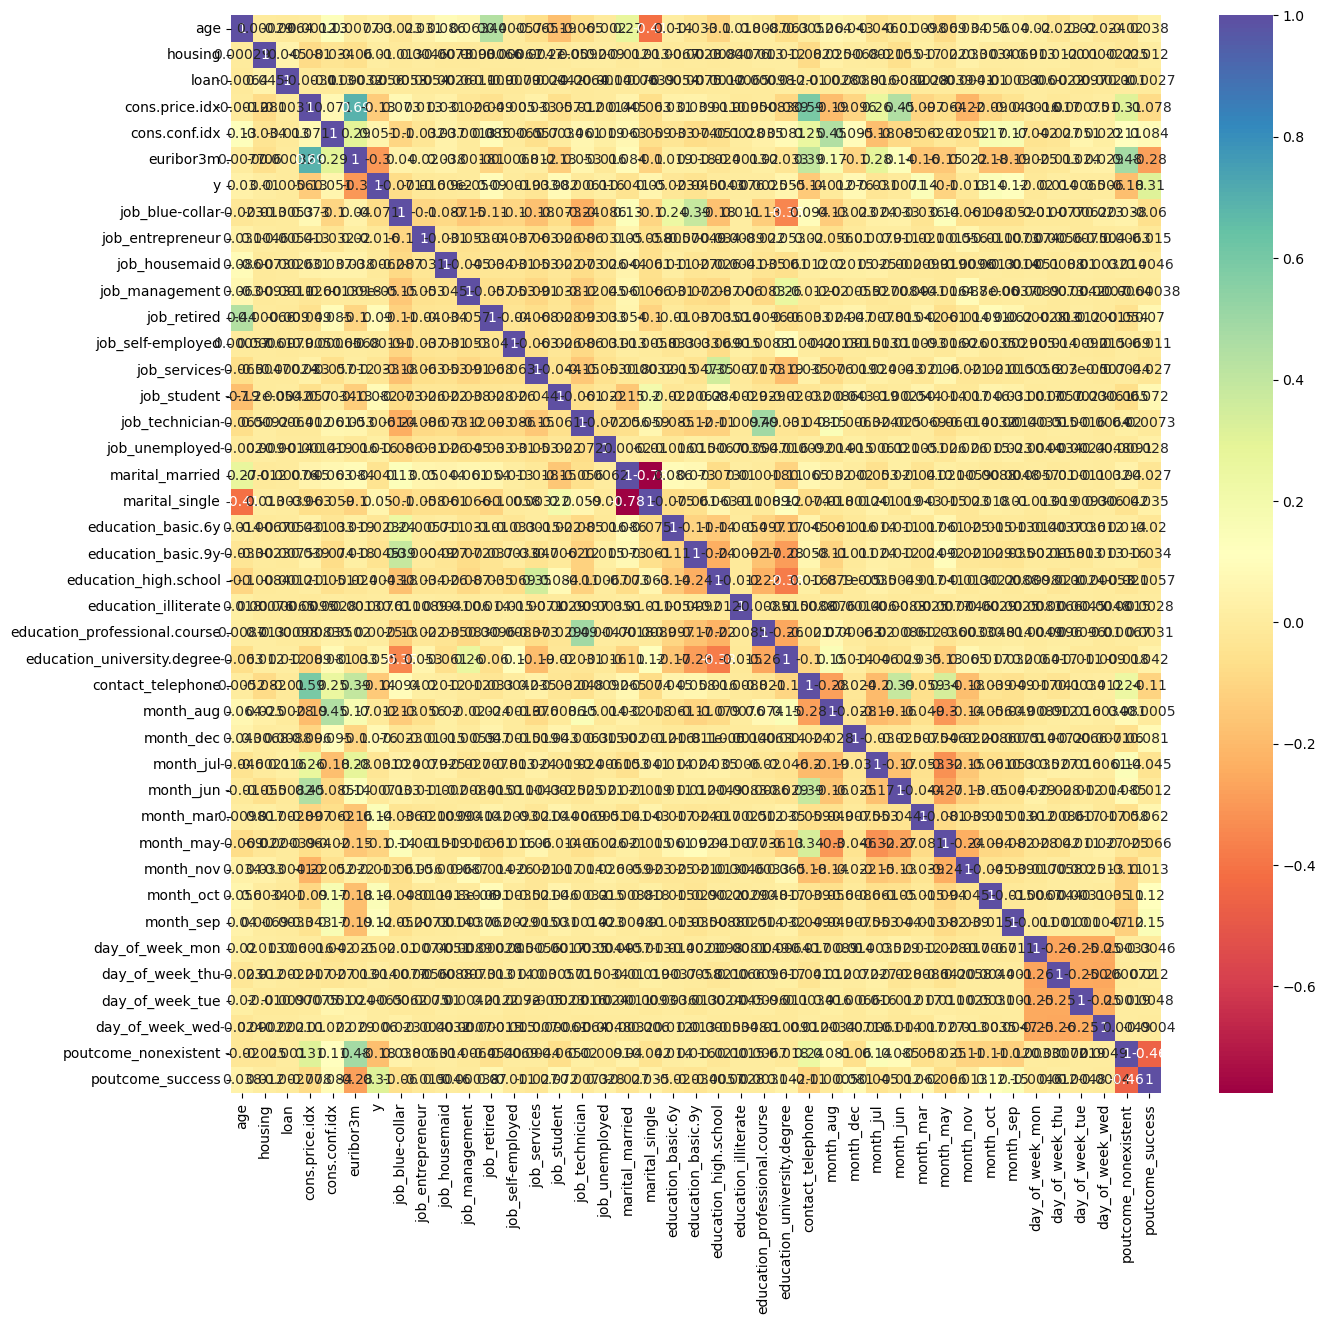

In [48]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [49]:
df.corr()["y"]

age                              0.030130
housing                          0.009996
loan                            -0.005603
cons.price.idx                  -0.133084
cons.conf.idx                    0.051424
euribor3m                       -0.300580
y                                1.000000
job_blue-collar                 -0.071404
job_entrepreneur                -0.015897
job_housemaid                   -0.006232
job_management                   0.000090
job_retired                      0.089646
job_self-employed               -0.001888
job_services                    -0.032759
job_student                      0.082182
job_technician                  -0.006091
job_unemployed                   0.016334
marital_married                 -0.040845
marital_single                   0.050106
education_basic.6y              -0.023322
education_basic.9y              -0.045009
education_high.school           -0.004306
education_illiterate             0.007650
education_professional.course    0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  int64  
 1   housing                        38245 non-null  int64  
 2   loan                           38245 non-null  int64  
 3   cons.price.idx                 38245 non-null  float64
 4   cons.conf.idx                  38245 non-null  float64
 5   euribor3m                      38245 non-null  float64
 6   y                              38245 non-null  int64  
 7   job_blue-collar                38245 non-null  bool   
 8   job_entrepreneur               38245 non-null  bool   
 9   job_housemaid                  38245 non-null  bool   
 10  job_management                 38245 non-null  bool   
 11  job_retired                    38245 non-null  bool   
 12  job_self-employed              38245 non-null  bool

# VI. Rescaling The Continuous Data

For continuous data, we use MinMaxScaler to scale and translate each feature individually such that it is in the given range on the training set. 

MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df[numerical_var] = scaler.fit_transform(df[numerical_var])

In [54]:
df.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  y  \
0  0.481481        0     0        0.698753        0.60251   0.957379  0   
1  0.493827        0     0        0.698753        0.60251   0.957379  0   
2  0.246914        1     0        0.698753        0.60251   0.957379  0   
3  0.283951        0     0        0.698753        0.60251   0.957379  0   
4  0.481481        0     1        0.698753        0.60251   0.957379  0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_may  \
0            False             False           True  ...       True   
1            False             False          False  ...       True   
2            False             False          False  ...       True   
3            False             False          False  ...       True   
4            False             False          False  ...       True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False      False             True            False   
1      False      False      False             True            False   
2      False      False      False             True            False   
3      False      False      False             True            False   
4      False      False      False             True            False   

   day_of_week_tue  day_of_week_wed  poutcome_nonexistent  poutcome_success  
0            False            False                  True             False  
1            False            False                  True             False  
2            False            False                  True             False  
3            False            False                  True             False  
4            False            False                  True             False  

[5 rows x 41 columns]

# VII. Split Data Into Train And Test Data

In [55]:
# Divide the train data into X and Y
y = df.pop('y')
X = df

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

In [58]:
print("Train Dataset: "+ str(len(X_train)) + " Test Dataset: " + str(len(X_test)))
print("Train Target Label counts: ")
print(y_train.value_counts())
print("Test Target Label counts: ")
print(y_test.value_counts())

Train Dataset: 30596 Test Dataset: 7649
Train Target Label counts: 
y
0    27195
1     3401
Name: count, dtype: int64
Test Target Label counts: 
y
0    6792
1     857
Name: count, dtype: int64


In [59]:
X_train.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  \
23054  0.259259        0     0        0.484412       0.615063   0.981864   
5288   0.234568        0     0        0.698753       0.602510   0.957379   
36510  0.271605        0     0        0.296960       0.418410   0.141918   
25250  0.246914        1     0        0.389322       0.368201   0.797778   
23216  0.493827        1     1        0.484412       0.615063   0.981864   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
23054            False             False          False           False  ...   
5288              True             False          False           False  ...   
36510            False             False          False           False  ...   
25250            False             False          False           False  ...   
23216            False             False          False           False  ...   

       month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
23054      False      False      False      False            False   
5288        True      False      False      False            False   
36510      False      False      False      False            False   
25250      False       True      False      False            False   
23216      False      False      False      False            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
23054            False             True            False   
5288             False            False            False   
36510            False            False             True   
25250            False             True            False   
23216            False             True            False   

       poutcome_nonexistent  poutcome_success  
23054                  True             False  
5288                   True             False  
36510                 False             False  
25250                  True             False  
23216                  True             False  

[5 rows x 40 columns]

In [60]:
X_test.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  \
6410   0.271605        0     0        0.698753       0.602510   0.957379   
31289  0.172840        1     0        0.269680       0.192469   0.158694   
8772   0.222222        0     0        0.882307       0.376569   0.959420   
7749   0.283951        1     0        0.698753       0.602510   0.958966   
31483  0.222222        0     1        0.269680       0.192469   0.158694   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
6410             False             False           True           False  ...   
31289             True             False          False           False  ...   
8772              True             False          False           False  ...   
7749             False             False          False           False  ...   
31483            False             False          False           False  ...   

       month_may  month_nov  month_oct  month_sep  day_of_week_mon  \
6410        True      False      False      False            False   
31289       True      False      False      False            False   
8772       False      False      False      False            False   
7749        True      False      False      False            False   
31483       True      False      False      False            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  \
6410             False            False             True   
31289            False            False             True   
8772              True            False            False   
7749             False            False            False   
31483            False            False             True   

       poutcome_nonexistent  poutcome_success  
6410                   True             False  
31289                  True             False  
8772                   True             False  
7749                   True             False  
31483                  True             False  

[5 rows x 40 columns]

# VIII. Model Building

In [61]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
# Draw ROC curve from training and testing data set
def draw_roc(train_actual, train_probs, test_actual, test_probs):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(train_actual, train_probs,
                                                               drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_actual, test_probs,
                                                               drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score(train_actual, train_probs)
    test_auc_score = metrics.roc_auc_score(test_actual, test_probs)
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [64]:
# Train model using hyperparameter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)
    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3, error_score='raise')
    grid.fit(X_train, y_train)
            
    return grid


In [65]:
# Predict value and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

## 1. Logistic Regression 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [68]:
y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob = prediction_model(logreg, X_train, y_train, X_test, y_test)

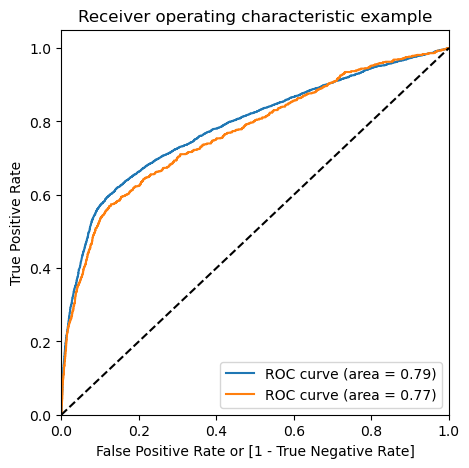

In [69]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [70]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.9008040266701529
Accuracy test:  0.899463982219898


## 2. Feature selection using RFE with 20 features

In [71]:
from sklearn.feature_selection import RFE

In [72]:
logreg_20f = LogisticRegression(random_state = 100)

In [73]:
rfe = RFE(estimator=logreg_20f, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(random_state=100), n_features_to_select=20)

In [74]:
# Column name, RFE is True/False, Ranking of column
print(list(zip(X_train, rfe.support_,rfe.ranking_)))
# Columns with RFE Support as True
col = X_train.columns[rfe.support_]
print(len(col), col)
# Columns with RFE Support as False
X_train.columns[~rfe.support_]

[('age', True, 1), ('housing', False, 15), ('loan', False, 5), ('cons.price.idx', True, 1), ('cons.conf.idx', True, 1), ('euribor3m', True, 1), ('job_blue-collar', True, 1), ('job_entrepreneur', False, 4), ('job_housemaid', False, 6), ('job_management', False, 7), ('job_retired', True, 1), ('job_self-employed', False, 8), ('job_services', True, 1), ('job_student', True, 1), ('job_technician', False, 21), ('job_unemployed', False, 20), ('marital_married', False, 13), ('marital_single', False, 14), ('education_basic.6y', False, 18), ('education_basic.9y', False, 16), ('education_high.school', False, 10), ('education_illiterate', False, 17), ('education_professional.course', False, 9), ('education_university.degree', False, 3), ('contact_telephone', True, 1), ('month_aug', False, 2), ('month_dec', True, 1), ('month_jul', True, 1), ('month_jun', True, 1), ('month_mar', True, 1), ('month_may', True, 1), ('month_nov', False, 19), ('month_oct', True, 1), ('month_sep', True, 1), ('day_of_week_

Index(['housing', 'loan', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_aug', 'month_nov',
       'day_of_week_thu', 'day_of_week_tue'],
      dtype='object')

In [75]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [76]:
logreg_rfe = LogisticRegression(random_state = 100)
logreg_rfe = logreg_rfe.fit(X_train_rfe, y_train)

In [77]:
y_train_pred_rfe, y_train_pred_rfe_prob, y_test_pred_rfe, y_test_pred_rfe_prob = prediction_model(logreg_rfe, X_train_rfe, y_train, X_test_rfe, y_test)

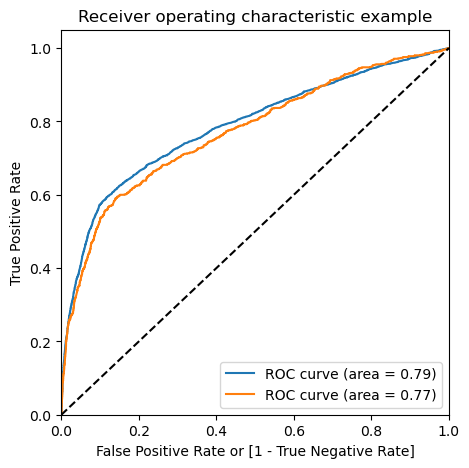

In [78]:
draw_roc(y_train, y_train_pred_rfe_prob, y_test, y_test_pred_rfe_prob)

In [79]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rfe))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rfe))

Accuracy train:  0.900411818538371
Accuracy test:  0.8990717740881161


## 3. Training model with hyperparameter tuning

In [80]:
lr_model = LogisticRegression(random_state=100)

In [81]:
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [82]:
lr_param_grid = [
    {'max_iter': [75, 100, 125],'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.5 , 1, 1.5]},
    {'max_iter': [75, 100, 125], 'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.5 , 1, 1.5]}
]
print(lr_param_grid)

[{'max_iter': [75, 100, 125], 'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.5, 1, 1.5]}, {'max_iter': [75, 100, 125], 'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5]}]


In [83]:
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train, y_train)

/Users/nguyenminhhieu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nguyenminhhieu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [84]:
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = prediction_model(lr_grid, X_train, y_train, X_test, y_test)

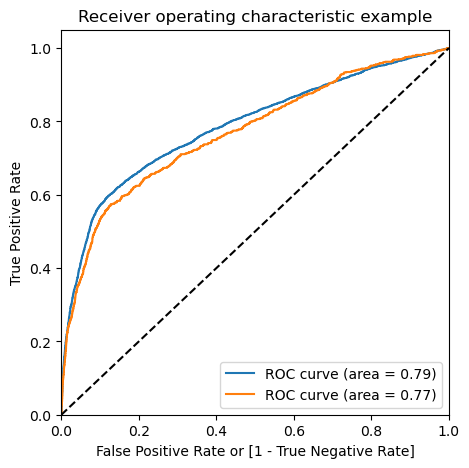

In [85]:
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [86]:
lr_grid.best_params_

{'C': 0.5, 'max_iter': 75, 'penalty': 'l2', 'solver': 'lbfgs'}

In [87]:
cv_results = pd.DataFrame(lr_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.450920      0.061311         0.013703        0.011680     0.5   
1        0.255177      0.052142         0.008096        0.002231     0.5   
2        0.312406      0.167850         0.009602        0.006793     0.5   
3        0.498661      0.122825         0.017508        0.013489       1   
4        0.312257      0.098108         0.007458        0.002520       1   
5        0.293250      0.074350         0.006593        0.001002       1   
6        0.370040      0.094691         0.008402        0.002399     1.5   
7        0.574295      0.149892         0.013402        0.011455     1.5   
8        0.646059      0.198459         0.013550        0.006803     1.5   
9        0.648007      0.048056         0.007228        0.002223     0.5   
10       0.150063      0.034360         0.005988        0.001775     0.5   
11       0.686708      0.058787         0.008886        0.002490     0.5   
12       0.209012      0.026863         0.008559        0.002342     0.5   
13       0.550416      0.062438         0.005246        0.001525     0.5   
14       0.165507      0.032630         0.007118        0.002600     0.5   
15       0.619356      0.091341         0.004008        0.000569       1   
16       0.133157      0.010005         0.005264        0.000979       1   
17       0.640462      0.094503         0.005034        0.001874       1   
18       0.179189      0.036297         0.007697        0.002585       1   
19       0.751294      0.090891         0.007812        0.003133       1   
20       0.214644      0.034540         0.010049        0.003964       1   
21       0.710364      0.075967         0.006724        0.002524     1.5   
22       0.187638      0.031751         0.008913        0.005539     1.5   
23       0.674127      0.077216         0.004993        0.001071     1.5   
24       0.140997      0.012777         0.005240        0.000882     1.5   
25       0.598352      0.078731         0.004609        0.000982     1.5   
26       0.158766      0.019984         0.006107        0.001783     1.5   

   param_max_iter param_penalty param_solver  \
0              75            l2        lbfgs   
1             100            l2        lbfgs   
2             125            l2        lbfgs   
3              75            l2        lbfgs   
4             100            l2        lbfgs   
5             125            l2        lbfgs   
6              75            l2        lbfgs   
7             100            l2        lbfgs   
8             125            l2        lbfgs   
9              75            l1    liblinear   
10             75            l2    liblinear   
11            100            l1    liblinear   
12            100            l2    liblinear   
13            125            l1    liblinear   
14            125            l2    liblinear   
15             75            l1    liblinear   
16             75            l2    liblinear   
17            100            l1    liblinear   
18            100            l2    liblinear   
19            125            l1    liblinear   
20            125            l2    liblinear   
21             75            l1    liblinear   
22             75            l2    liblinear   
23            100            l1    liblinear   
24            100            l2    liblinear   
25            125            l1    liblinear   
26            125            l2    liblinear   

                                               params  split0_test_score  ...  \
0   {'C': 0.5, 'max_iter': 75, 'penalty': 'l2', 's...           0.749039  ...   
1   {'C': 0.5, 'max_iter': 100, 'penalty': 'l2', '...           0.749039  ...   
2   {'C': 0.5, 'max_iter': 125, 'penalty': 'l2', '...           0.749039  ...   
3   {'C': 1, 'max_iter': 75, 'penalty': 'l2', 'sol...           0.748883  ...   
4   {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so...           0.748883  ...   
5   {'C': 1, 'max_iter': 125, 'penalty': 'l2

In [88]:
cv_results[["param_max_iter", "param_penalty", "param_solver", "mean_train_score","mean_test_score"]]

param_max_iter param_penalty param_solver  mean_train_score  \
0              75            l2        lbfgs          0.787317   
1             100            l2        lbfgs          0.787317   
2             125            l2        lbfgs          0.787317   
3              75            l2        lbfgs          0.787325   
4             100            l2        lbfgs          0.787326   
5             125            l2        lbfgs          0.787326   
6              75            l2        lbfgs          0.787327   
7             100            l2        lbfgs          0.787327   
8             125            l2        lbfgs          0.787327   
9              75            l1    liblinear          0.787079   
10             75            l2    liblinear          0.787286   
11            100            l1    liblinear          0.787079   
12            100            l2    liblinear          0.787286   
13            125            l1    liblinear          0.787079   
14            125            l2    liblinear          0.787286   
15             75            l1    liblinear          0.787208   
16             75            l2    liblinear          0.787317   
17            100            l1    liblinear          0.787208   
18            100            l2    liblinear          0.787317   
19            125            l1    liblinear          0.787208   
20            125            l2    liblinear          0.787317   
21             75            l1    liblinear          0.787251   
22             75            l2    liblinear          0.787326   
23            100            l1    liblinear          0.787251   
24            100            l2    liblinear          0.787326   
25            125            l1    liblinear          0.787251   
26            125            l2    liblinear          0.787326   

    mean_test_score  
0          0.783799  
1          0.783799  
2          0.783799  
3          0.783751  
4          0.783749  
5          0.783749  
6          0.783728  
7          0.783727  
8          0.783727  
9          0.783674  
10         0.783740  
11         0.783674  
12         0.783740  
13         0.783674  
14         0.783740  
15         0.783652  
16         0.783722  
17         0.783652  
18         0.783722  
19         0.783652  
20         0.783722  
21         0.783662  
22         0.783706  
23         0.783662  
24         0.783706  
25         0.783662  
26         0.783706

In [89]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_lr))

Accuracy train:  0.9009674467250621
Accuracy test:  0.8990717740881161


## 4. Random Forest Classifier

In [90]:
rf_param_grid = [{'n_estimators': [30, 50, 75, 100],
                  'max_depth': [5, 6, 7, 8, 9, 10],
                  'max_features': [10, 15, 25, 30]}]
print(rf_param_grid )

[{'n_estimators': [30, 50, 75, 100], 'max_depth': [5, 6, 7, 8, 9, 10], 'max_features': [10, 15, 25, 30]}]


In [91]:
rf_model = RandomForestClassifier()

In [92]:
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', rf_param_grid, X_train, y_train)

In [93]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = prediction_model(rf_grid, X_train, y_train, X_test, y_test)

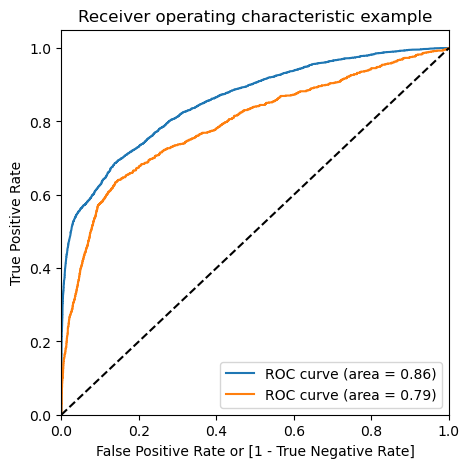

In [94]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [95]:
rf_grid.best_params_

{'max_depth': 10, 'max_features': 15, 'n_estimators': 75}

In [96]:
rf_cv_results = pd.DataFrame(rf_grid.cv_results_)
rf_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.438723      0.086813         0.009387        0.000313   
1        0.660895      0.072080         0.014373        0.002931   
2        0.972802      0.059659         0.019752        0.002578   
3        1.294158      0.112945         0.023664        0.001905   
4        0.506334      0.018994         0.009729        0.001067   
..            ...           ...              ...             ...   
91       4.130478      0.088396         0.038631        0.001028   
92       1.493202      0.084935         0.014170        0.000668   
93       2.476970      0.095162         0.022398        0.003294   
94       3.705690      0.114505         0.033843        0.010081   
95       4.836868      0.245539         0.038477        0.002628   

   param_max_depth param_max_features param_n_estimators  \
0                5                 10                 30   
1                5                 10                 50   
2                5                 10                 75   
3                5                 10                100   
4                5                 15                 30   
..             ...                ...                ...   
91              10                 25                100   
92              10                 30                 30   
93              10                 30                 50   
94              10                 30                 75   
95              10                 30                100   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.762498   
1   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.767525   
2   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.770223   
3   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.767235   
4   {'max_depth': 5, 'max_features': 15, 'n_estima...           0.756728   
..                                                ...                ...   
91  {'max_depth': 10, 'max_features': 25, 'n_estim...           0.777628   
92  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.773141   
93  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.776909   
94  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.774989   
95  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.776951   

    split1_test_score  ...  split2_train_score  split3_train_score  \
0            0.801937  ...            0.797502            0.796895   
1            0.799716  ...            0.796295            0.793700   
2            0.800974  ...            0.800567            0.797249   
3            0.801430  ...            0.798957            0.795568   
4            0.805298  ...            0.800024            0.796921   
..                ...  ...                 ...                 ...   
91           0.816172  ...            0.881642            0.874460   
92           0.816678  ...            0.876281            0.875828   
93           0.819520  ...            0.876858            0.877055   
94           0.819434  ...            0.883575            0.875968   
95           0.815385  ...            0.883625            0.879749   

    split4_train_score  split5_train_score  split6_train_score  \
0             0.794320            0.793663            0.796146   
1             0.797015            0.793437            0.796098   
2             0.797072            0.793237            0.793996   
3             0.798204            0.795576            0.798014   
4             0.799352            0.793799            0.799982   
..                 ...                 ...                 ...   
91            0.876498            0.876870            0.875224   
92            0.874822            0.876436            0.869407   
93            0.878970            0.876367            0.875345   
94            0.879264            0.881253          

In [97]:
rf_cv_results[["param_max_depth", "param_max_features", "param_n_estimators", "mean_train_score","mean_test_score"]]

param_max_depth param_max_features param_n_estimators  mean_train_score  \
0                5                 10                 30          0.795475   
1                5                 10                 50          0.795965   
2                5                 10                 75          0.796697   
3                5                 10                100          0.797018   
4                5                 15                 30          0.797458   
..             ...                ...                ...               ...   
91              10                 25                100          0.875461   
92              10                 30                 30          0.873140   
93              10                 30                 50          0.876929   
94              10                 30                 75          0.879268   
95              10                 30                100          0.879244   

    mean_test_score  
0          0.790797  
1          0.790586  
2          0.790981  
3          0.791273  
4          0.790692  
..              ...  
91         0.796727  
92         0.796409  
93         0.795269  
94         0.796527  
95         0.796281  

[96 rows x 5 columns]

In [98]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rf))

Accuracy train:  0.9230618381487776
Accuracy test:  0.8990717740881161


## 5. Gradient Boost

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gb_model = GradientBoostingClassifier(verbose = 1)

In [101]:
gb_param_grid=[{'learning_rate': [0.05, 0.1, 0.15],
               'n_iter_no_change': [None, 5, 10],
               'n_estimators': [30, 50, 75, 100]}]

In [102]:
gb_grid = training_model_hyperparameter(gb_model, 'roc_auc', gb_param_grid, X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.6787            0.94s
         2           0.6638            0.96s
         3           0.6516            0.97s
         4           0.6414            0.91s
         5           0.6325            0.87s
         6           0.6249            0.82s
         7           0.6183            0.77s
         8           0.6123            0.76s
         9           0.6072            0.72s
        10           0.6024            0.68s
        20           0.5740            0.34s
        30           0.5600            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6787            1.23s
         2           0.6637            1.16s
         3           0.6515            1.10s
         4           0.6410            1.05s
         5           0.6322            1.03s
         6           0.6245            1.00s
         7           0.6179            0.98s
         8           0.6118            0.95s
        

        50           0.5436            0.84s
        60           0.5405            0.51s
        70           0.5378            0.17s
      Iter       Train Loss   Remaining Time 
         1           0.6783            2.56s
         2           0.6633            2.48s
         3           0.6511            2.48s
         4           0.6407            2.44s
         5           0.6318            2.42s
         6           0.6241            2.39s
         7           0.6174            2.35s
         8           0.6114            2.34s
         9           0.6062            2.29s
        10           0.6013            2.25s
        20           0.5726            1.87s
        30           0.5589            1.51s
        40           0.5520            1.18s
        50           0.5474            0.84s
        60           0.5444            0.51s
        70           0.5419            0.17s
      Iter       Train Loss   Remaining Time 
         1           0.6792            2.46s
        

        50           0.5495            0.84s
        60           0.5464            0.51s
        70           0.5438            0.17s
      Iter       Train Loss   Remaining Time 
         1           0.6783            2.53s
         2           0.6632            2.67s
         3           0.6508            2.61s
         4           0.6403            2.58s
         5           0.6315            2.50s
         6           0.6236            2.48s
         7           0.6170            2.45s
         8           0.6109            2.40s
         9           0.6057            2.36s
        10           0.6008            2.30s
        20           0.5719            1.91s
        30           0.5573            1.56s
        40           0.5502            1.21s
        50           0.5453            0.86s
        60           0.5418            0.51s
        70           0.5394            0.17s
      Iter       Train Loss   Remaining Time 
         1           0.6787            2.69s
        

        50           0.5478            0.85s
        60           0.5448            0.51s
        70           0.5420            0.17s
      Iter       Train Loss   Remaining Time 
         1           0.6786            2.50s
         2           0.6636            2.56s
         3           0.6514            2.51s
         4           0.6411            2.48s
         5           0.6322            2.44s
         6           0.6247            2.40s
         7           0.6180            2.34s
         8           0.6122            2.30s
         9           0.6068            2.26s
        10           0.6023            2.21s
        20           0.5730            1.86s
        30           0.5590            1.52s
        40           0.5515            1.19s
        50           0.5464            0.85s
        60           0.5433            0.51s
        70           0.5409            0.17s
      Iter       Train Loss   Remaining Time 
         1           0.6779            2.73s
        

      Iter       Train Loss   Remaining Time 
         1           0.6612            0.97s
         2           0.6385            0.94s
         3           0.6226            0.90s
         4           0.6097            0.86s
         5           0.6006            0.83s
         6           0.5922            0.80s
         7           0.5864            0.76s
         8           0.5806            0.73s
         9           0.5767            0.70s
        10           0.5725            0.67s
        20           0.5514            0.34s
        30           0.5445            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6605            0.98s
         2           0.6376            0.96s
         3           0.6210            0.91s
         4           0.6088            0.88s
         5           0.5990            0.85s
         6           0.5911            0.81s
         7           0.5849            0.78s
         8           0.5792            0.75s
        

        30           0.5438            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6603            0.99s
         2           0.6375            0.95s
         3           0.6216            0.91s
         4           0.6085            0.87s
         5           0.5993            0.85s
         6           0.5909            0.82s
         7           0.5839            0.79s
         8           0.5790            0.76s
         9           0.5742            0.72s
        10           0.5709            0.68s
        20           0.5494            0.34s
        30           0.5416            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6612            0.99s
         2           0.6386            0.93s
         3           0.6224            0.91s
         4           0.6107            0.88s
         5           0.6007            0.85s
         6           0.5926            0.84s
         7           0.5867            0.81s
        

        20           0.5540            0.35s
        30           0.5468            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6595            0.99s
         2           0.6360            0.95s
         3           0.6190            0.92s
         4           0.6064            0.87s
         5           0.5962            0.84s
         6           0.5878            0.80s
         7           0.5815            0.77s
         8           0.5758            0.73s
         9           0.5716            0.70s
        10           0.5676            0.66s
        20           0.5472            0.33s
        30           0.5394            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6603            1.07s
         2           0.6374            1.05s
         3           0.6209            1.01s
         4           0.6086            0.96s
         5           0.5986            0.93s
         6           0.5910            0.89s
        

        40           0.5375            1.27s
        50           0.5343            0.90s
        60           0.5324            0.55s
        70           0.5305            0.18s
      Iter       Train Loss   Remaining Time 
         1           0.6607            3.32s
         2           0.6381            3.30s
         3           0.6218            3.26s
         4           0.6097            3.24s
         5           0.5997            3.20s
         6           0.5916            3.16s
         7           0.5856            3.13s
         8           0.5801            3.09s
         9           0.5761            3.07s
        10           0.5722            3.04s
        20           0.5519            3.47s
        30           0.5448            3.17s
        40           0.5403            2.65s
        50           0.5376            2.19s
        60           0.5353            1.71s
        70           0.5333            1.25s
        80           0.5315            0.82s
        9

        20           0.5515            2.04s
        30           0.5431            1.67s
        40           0.5386            1.26s
        50           0.5359            0.89s
        60           0.5336            0.60s
        70           0.5313            0.20s
      Iter       Train Loss   Remaining Time 
         1           0.6601            3.88s
         2           0.6370            3.83s
         3           0.6204            3.82s
         4           0.6081            3.86s
         5           0.5980            3.95s
         6           0.5905            4.01s
         7           0.5835            4.03s
         8           0.5779            3.97s
         9           0.5738            3.89s
        10           0.5697            3.82s
        20           0.5492            3.20s
        30           0.5420            2.68s
        40           0.5378            2.28s
        50           0.5344            1.92s
        60           0.5325            1.55s
        7

        70           0.5297            0.19s
      Iter       Train Loss   Remaining Time 
         1           0.6596            4.18s
         2           0.6363            4.00s
         3           0.6195            4.00s
         4           0.6071            4.08s
         5           0.5968            4.07s
         6           0.5885            3.99s
         7           0.5822            3.91s
         8           0.5766            3.84s
         9           0.5724            3.77s
        10           0.5683            3.70s
        20           0.5473            3.02s
        30           0.5401            2.56s
        40           0.5359            2.42s
        50           0.5325            2.10s
        60           0.5299            1.68s
        70           0.5279            1.26s
        80           0.5263            0.83s
        90           0.5249            0.41s
       100           0.5235            0.00s
      Iter       Train Loss   Remaining Time 
        

      Iter       Train Loss   Remaining Time 
         1           0.6436            3.40s
         2           0.6174            3.30s
         3           0.6008            3.24s
         4           0.5884            3.17s
         5           0.5804            3.12s
         6           0.5729            3.08s
         7           0.5677            3.05s
         8           0.5643            3.01s
         9           0.5595            2.98s
        10           0.5569            2.97s
        20           0.5431            2.69s
        30           0.5372            2.34s
        40           0.5338            2.01s
        50           0.5316            1.67s
        60           0.5294            1.34s
        70           0.5278            1.00s
        80           0.5256            0.66s
        90           0.5242            0.33s
       100           0.5226            0.00s


In [103]:
y_train_pred_gb, y_train_pred_gb_prob, y_test_pred_gb, y_test_pred_gb_prob = prediction_model(gb_grid, X_train, y_train, X_test, y_test)

In [104]:
gb_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 100, 'n_iter_no_change': None}

In [105]:
gb_cv_results = pd.DataFrame(gb_grid.cv_results_)
gb_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.190263      0.111453         0.006561        0.001514   
1        1.092690      0.054484         0.005502        0.000840   
2        1.069461      0.010191         0.005449        0.000335   
3        1.805866      0.097582         0.006377        0.001016   
4        1.713755      0.020333         0.006167        0.000473   
5        1.818716      0.036366         0.006271        0.000557   
6        2.642445      0.098022         0.007146        0.000407   
7        2.608875      0.103203         0.007080        0.000055   
8        2.531102      0.046587         0.007152        0.000213   
9        3.593682      0.141142         0.011703        0.006415   
10       3.232806      0.452189         0.008372        0.000376   
11       3.686651      0.260069         0.010813        0.005626   
12       1.102393      0.065452         0.005258        0.000524   
13       1.057946      0.022918         0.005302        0.000397   
14       1.059969      0.033032         0.005363        0.000954   
15       1.796453      0.091742         0.006975        0.001574   
16       1.836092      0.099352         0.007035        0.000697   
17       1.730001      0.062275         0.006072        0.000151   
18       2.593944      0.088861         0.007643        0.001109   
19       2.080256      0.305122         0.007428        0.001299   
20       2.829641      0.340840         0.008302        0.001706   
21       4.020286      0.372291         0.011230        0.002631   
22       2.182962      0.325855         0.008096        0.001861   
23       3.529762      0.862739         0.009707        0.002744   
24       1.053687      0.039852         0.005021        0.000249   
25       1.023196      0.011322         0.005120        0.000281   
26       1.288854      0.240781         0.006618        0.002204   
27       1.818704      0.098994         0.006409        0.000294   
28       1.538616      0.223695         0.005800        0.000451   
29       1.757530      0.095303         0.006324        0.000881   
30       2.658439      0.110897         0.007260        0.000362   
31       1.658429      0.349475         0.006232        0.000617   
32       1.611017      0.365861         0.006314        0.001350   
33       3.636593      0.275778         0.008704        0.001462   
34       1.624717      0.349962         0.005854        0.000482   
35       2.037065      0.387402         0.006507        0.001478   

   param_learning_rate param_n_estimators param_n_iter_no_change  \
0                 0.05                 30                   None   
1                 0.05                 30                      5   
2                 0.05                 30                     10   
3                 0.05                 50                   None   
4                 0.05                 50                      5   
5                 0.05                 50                     10   
6                 0.05                 75                   None   
7                 0.05                 75                      5   
8                 0.05                 75                     10   
9                 0.05                100                   None   
10                0.05                100                      5   
11                0.05                100                     10   
12                 0.1                 30                   None   
13                 0.1                 30                      5   
14                 0.1                 30                     10   
15                 0.1                 50                   None   
16                 0.1                 50                      5   
17                 0.1                 50                     10   
18                 0.1                 75                   None   
19                 0.1                 75                      5   
20                 0.1                 75                  

In [106]:
gb_cv_results[["param_learning_rate", "param_n_estimators", "param_n_iter_no_change","mean_train_score","mean_test_score"]]

param_learning_rate param_n_estimators param_n_iter_no_change  \
0                 0.05                 30                   None   
1                 0.05                 30                      5   
2                 0.05                 30                     10   
3                 0.05                 50                   None   
4                 0.05                 50                      5   
5                 0.05                 50                     10   
6                 0.05                 75                   None   
7                 0.05                 75                      5   
8                 0.05                 75                     10   
9                 0.05                100                   None   
10                0.05                100                      5   
11                0.05                100                     10   
12                 0.1                 30                   None   
13                 0.1                 30                      5   
14                 0.1                 30                     10   
15                 0.1                 50                   None   
16                 0.1                 50                      5   
17                 0.1                 50                     10   
18                 0.1                 75                   None   
19                 0.1                 75                      5   
20                 0.1                 75                     10   
21                 0.1                100                   None   
22                 0.1                100                      5   
23                 0.1                100                     10   
24                0.15                 30                   None   
25                0.15                 30                      5   
26                0.15                 30                     10   
27                0.15                 50                   None   
28                0.15                 50                      5   
29                0.15                 50                     10   
30                0.15                 75                   None   
31                0.15                 75                      5   
32                0.15                 75                     10   
33                0.15                100                   None   
34                0.15                100                      5   
35                0.15                100                     10   

    mean_train_score  mean_test_score  
0           0.777014         0.775476  
1           0.777946         0.776868  
2           0.777052         0.775326  
3           0.792083         0.788283  
4           0.791829         0.788528  
5           0.791375         0.788704  
6           0.795697         0.790839  
7           0.795862         0.791861  
8           0.795773         0.792370  
9           0.798569         0.793051  
10          0.797740         0.793491  
11          0.798787         0.793536  
12          0.793465         0.789712  
13          0.793947         0.790069  
14          0.793897         0.790459  
15          0.798777         0.793590  
16          0.798216         0.793491  
17          0.798355         0.793284  
18          0.803508         0.796788  
19          0.800031         0.793503  
20          0.802426         0.795324  
21          0.806604         0.798387  
22          0.799631         0.793795  
23          0.802956         0.795983  
24          0.797452         0.792973  
25          0.797355         0.792808  
26          0.797612         0.793060  
27          0.803388         0.796882  
28          0.801607         0.795875  
29          0.802915         0.796629  
30          0.807751         0.799073  
31          0.801672         0.795503  
32          0.801098         0.795961  
33          0.810825         0.799445  
34          0.802109         0.795933  
35          0.804515         0.796535

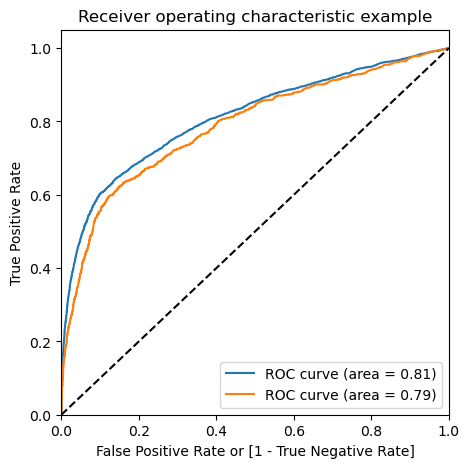

In [107]:
draw_roc(y_train, y_train_pred_gb_prob, y_test, y_test_pred_gb_prob)

In [108]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_gb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_gb))

Accuracy train:  0.9078637730422278
Accuracy test:  0.8981566217806249


## 6. Support Vector Machine

In [109]:
from sklearn.svm import SVC

In [110]:
svc_model = SVC()

In [111]:
svc_param_grid = {"kernel": ["linear", "rbf"],
    "degree": [1, 2]}

In [112]:
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', svc_param_grid, X_train, y_train)

In [113]:
svc_grid.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [114]:
cv_results = pd.DataFrame(svc_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_degree  \
0      11.831543      0.210400         0.770608        0.051406            1   
1      40.995467      3.455464         3.747146        0.353512            1   
2      13.849212      3.643455         0.876517        0.099162            2   
3      44.199132      6.760056         4.006011        0.779084            2   

  param_kernel                             params  split0_test_score  \
0       linear  {'degree': 1, 'kernel': 'linear'}           0.621445   
1          rbf     {'degree': 1, 'kernel': 'rbf'}           0.711338   
2       linear  {'degree': 2, 'kernel': 'linear'}           0.621445   
3          rbf     {'degree': 2, 'kernel': 'rbf'}           0.711338   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.674605           0.561514  ...            0.577252   
1           0.715973           0.701332  ...            0.850356   
2           0.674605           0.561514  ...            0.577252   
3           0.715973           0.701332  ...            0.850356   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.620769            0.617364            0.634918   
1            0.851146            0.851843            0.853085   
2            0.620769            0.617364            0.634918   
3            0.851146            0.851843            0.853085   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.618616            0.621526            0.625349   
1            0.846804            0.846265            0.851890   
2            0.618616            0.621526            0.625349   
3            0.846804            0.846265            0.851890   

   split9_train_score  mean_train_score  std_train_score  
0            0.570622          0.622019         0.030433  
1            0.851831          0.850131         0.002195  
2            0.570622          0.622019         0.030433  
3            0.851831          0.850131         0.002195  

[4 rows x 32 columns]

In [115]:
cv_results[["param_kernel","param_degree","mean_train_score","mean_test_score"]]

param_kernel param_degree  mean_train_score  mean_test_score
0       linear            1          0.622019         0.619868
1          rbf            1          0.850131         0.710399
2       linear            2          0.622019         0.619868
3          rbf            2          0.850131         0.710399

In [116]:
print("Accuracy train: ", accuracy_score(y_train, svc_grid.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_test, svc_grid.predict(X_test)))

Accuracy train:  0.9021440711204078
Accuracy test:  0.8969799973852791


## 7. XGBOOST

In [117]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [118]:
from xgboost import XGBClassifier

In [119]:
xgb_model = XGBClassifier()

In [125]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1 = xgb1.fit(X_train, y_train)

In [126]:
prediction1= xgb1.predict(X_test)

In [127]:
print("Accuracy train: ", accuracy_score(y_train, xgb1.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_test, xgb1.predict(X_test)))

Accuracy train:  0.9383906392992548
Accuracy test:  0.8904431951889136


In [140]:
xgb_param_grid = {'max_depth': range(3,10,1),
           'min_child_weight':range(1,10,1)}

In [141]:
xgb_grid = training_model_hyperparameter(xgb1, 'roc_auc', xgb_param_grid, X_train, y_train)

In [142]:
xgb_grid.best_params_

{'max_depth': 3, 'min_child_weight': 9}

In [143]:
cv_results = pd.DataFrame(xgb_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.191522      0.188537         0.039649        0.005840   
1        3.365599      0.275150         0.043007        0.007713   
2        2.876414      0.152574         0.033306        0.002807   
3        2.576919      0.077078         0.031832        0.001521   
4        2.896311      0.188865         0.035625        0.005539   
..            ...           ...              ...             ...   
58       5.613169      0.239716         0.086211        0.010866   
59       6.662152      0.577122         0.103534        0.032412   
60       5.899237      0.273145         0.088794        0.011454   
61       6.274285      1.099634         0.112938        0.040566   
62       5.736351      0.963371         0.098316        0.026301   

   param_max_depth param_min_child_weight  \
0                3                      1   
1                3                      2   
2                3                      3   
3                3                      4   
4                3                      5   
..             ...                    ...   
58               9                      5   
59               9                      6   
60               9                      7   
61               9                      8   
62               9                      9   

                                     params  split0_test_score  \
0   {'max_depth': 3, 'min_child_weight': 1}           0.773487   
1   {'max_depth': 3, 'min_child_weight': 2}           0.772051   
2   {'max_depth': 3, 'min_child_weight': 3}           0.775769   
3   {'max_depth': 3, 'min_child_weight': 4}           0.775104   
4   {'max_depth': 3, 'min_child_weight': 5}           0.775185   
..                                      ...                ...   
58  {'max_depth': 9, 'min_child_weight': 5}           0.737524   
59  {'max_depth': 9, 'min_child_weight': 6}           0.742529   
60  {'max_depth': 9, 'min_child_weight': 7}           0.740207   
61  {'max_depth': 9, 'min_child_weight': 8}           0.743866   
62  {'max_depth': 9, 'min_child_weight': 9}           0.747975   

    split1_test_score  split2_test_score  ...  split2_train_score  \
0            0.816018           0.768522  ...            0.860377   
1            0.814463           0.768477  ...            0.859398   
2            0.815443           0.769534  ...            0.859428   
3            0.815340           0.768632  ...            0.858118   
4            0.814332           0.767685  ...            0.856789   
..                ...                ...  ...                 ...   
58           0.758778           0.734692  ...            0.989164   
59           0.767187           0.738018  ...            0.985497   
60           0.763925           0.742758  ...            0.981123   
61           0.772938           0.744409  ...            0.977095   
62           0.774888           0.742778  ...            0.973334   

    split3_train_score  split4_train_score  split5_train_score  \
0             0.858902            0.858819            0.858132   
1             0.858342            0.857900            0.856817   
2             0.858591            0.856709            0.856027   
3             0.857702            0.855083            0.854729   
4             0.856728            0.855473            0.854235   
..                 ...                 ...                 ...   
58            0.989303            0.989246            0.988946   
59            0.985146            0.985688            0.984882   
60            0.981408            0.981802            0.981304   
61            0.977444            0.977260            0.977274   
62            0.973608            0.973085            0.973401   

    split6_train_score  split7_train_score  split8_train_score  \
0             0.858253            0.857430            0.856022   
1             0.857623            0.857557            0.855933   
2             0.855409           

In [144]:
cv_results[["param_max_depth", "param_min_child_weight", "mean_train_score", "mean_test_score"]]

param_max_depth param_min_child_weight  mean_train_score  mean_test_score
0                3                      1          0.858244         0.792046
1                3                      2          0.857571         0.791855
2                3                      3          0.856586         0.792230
3                3                      4          0.855890         0.792139
4                3                      5          0.854854         0.792434
..             ...                    ...               ...              ...
58               9                      5          0.989154         0.747627
59               9                      6          0.985294         0.751152
60               9                      7          0.981351         0.752456
61               9                      8          0.977280         0.754115
62               9                      9          0.973302         0.755485

[63 rows x 4 columns]

In [145]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=9,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb2 = xgb2.fit(X_train, y_train)

In [146]:
xgb_param_grid2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

In [149]:
xgb_grid2 = training_model_hyperparameter(xgb2, 'roc_auc', xgb_param_grid2, X_train, y_train)

In [150]:
xgb_grid2.best_params_

{'gamma': 0.2}

In [153]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=9,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb3 = xgb3.fit(X_train, y_train)

In [155]:
xgb_param_grid3 ={'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]}

In [156]:
xgb_grid3 = training_model_hyperparameter(xgb3, 'roc_auc', xgb_param_grid3, X_train, y_train)

In [157]:
xgb_grid3.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.9}

In [159]:
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=9,
 gamma=0.2,
 subsample=0.9,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4 = xgb4.fit(X_train, y_train)

In [161]:
xgb_param_grid4 = {'learning_rate': [0.05, 0.1, 0.15]}

In [162]:
xgb_grid4 = training_model_hyperparameter(xgb4, 'roc_auc', xgb_param_grid4, X_train, y_train)

In [163]:
xgb_grid4.best_params_

{'learning_rate': 0.05}

In [164]:
y_train_pred_xgb, y_train_pred_xgb_prob, y_test_pred_xgb, y_test_pred_xgb_prob = prediction_model(gb_grid, X_train, y_train, X_test, y_test)

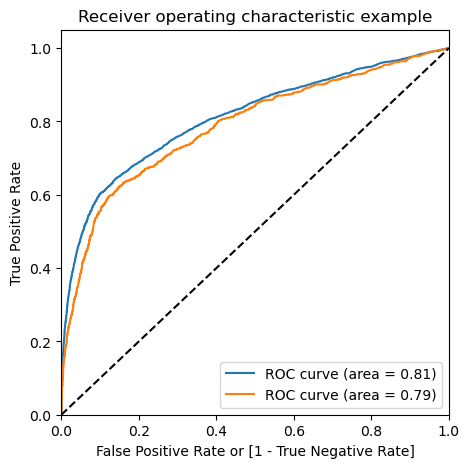

In [165]:
draw_roc(y_train, y_train_pred_xgb_prob, y_test, y_test_pred_xgb_prob)

In [166]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_xgb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_xgb))

Accuracy train:  0.9078637730422278
Accuracy test:  0.8981566217806249


# IX. Compare Model

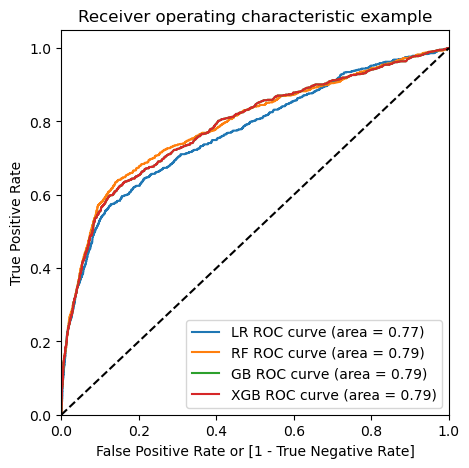

In [167]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve( y_test, y_test_pred_lr_prob,
                                              drop_intermediate = False )
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve( y_test, y_test_pred_rf_prob,
                                              drop_intermediate = False )
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve( y_test, y_test_pred_gb_prob,
                                              drop_intermediate = False )
xgb_fpr, xgb_tpr, xgb_thresholds = metrics.roc_curve( y_test, y_test_pred_xgb_prob,
                                              drop_intermediate = False )
lr_auc_score = metrics.roc_auc_score( y_test, y_test_pred_lr_prob )
rf_auc_score = metrics.roc_auc_score( y_test, y_test_pred_rf_prob )
gb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_gb_prob )
xgb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_xgb_prob )
plt.figure(figsize=(5, 5))
plt.plot( lr_fpr, lr_tpr, label='LR ROC curve (area = %0.2f)' % lr_auc_score )
plt.plot( rf_fpr, rf_tpr, label='RF ROC curve (area = %0.2f)' % rf_auc_score )
plt.plot( gb_fpr, gb_tpr, label='GB ROC curve (area = %0.2f)' % gb_auc_score )
plt.plot( gb_fpr, gb_tpr, label='XGB ROC curve (area = %0.2f)' % xgb_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

References:¶
1) Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron.
2) Special Thanks to Ahmet Taspinar. (Insights on a handul of functions) Link: http://ataspinar.com/2017/05/26/classification-with-scikit-learn/
3) Special Thanks to SHUBHAM CHAURASIA and his work. Link: 
https://www.kaggle.com/code/zyper26/bank-marketing-lr-rf-gb-svm-xgboost/notebook#Bank-Marketing-(with-social/economic-context)